# 📌필요 모듈 다운로드

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
import platform
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')
import graphviz
import seaborn as sns
%matplotlib inline
# Set fonts for Korean characters
# check the following link to download `나눔고딕`: http://hangeul.naver.com/2017/nanum
if str(platform.system()) == 'Windows':
    font_name = 'C:/Windows/Fonts/NanumGothic.ttf'             # windows
else:
    font_name = '/Users/nicole/Library/Fonts/NanumGothic.ttf'  # mac or linux
font_name = fm.FontProperties(fname=font_name).get_name()
plt.rc('font', family=font_name)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# 📌데이터 전처리

In [4]:
# 데이터 불러오기

Bitcoin = pd.read_csv('rawdata/Bitcoin.csv')

Copper = pd.read_csv('rawdata/원자재데이터/Copper.csv', encoding='cp949')
Gold = pd.read_csv('rawdata/원자재데이터/Gold.csv', encoding='cp949')
Oil = pd.read_csv('rawdata/원자재데이터/Oil.csv', encoding='cp949')
Silver = pd.read_csv('rawdata/원자재데이터/Silver.csv', encoding='cp949')

Skhynix = pd.read_csv('rawdata/주식데이터/SK하이닉스.csv', encoding='cp949')
Samsung = pd.read_csv('rawdata/주식데이터/삼성.csv', encoding='cp949')
Soulbrain = pd.read_csv('rawdata/주식데이터/솔브레인.csv', encoding='cp949')
Adtek = pd.read_csv('rawdata/주식데이터/에이디테크놀로지.csv', encoding='cp949')
Oceanbridge = pd.read_csv('rawdata/주식데이터/오션브릿지.csv', encoding='cp949')
Ips = pd.read_csv('rawdata/주식데이터/원익IPS.csv', encoding='cp949')
Eugenetech = pd.read_csv('rawdata/주식데이터/유진테크.csv', encoding='cp949')

GoogleTrend = pd.read_csv('rawdata/구글트렌드 통합.csv')
NaverTrend = pd.read_csv('rawdata/네이버트렌드지수.csv', encoding='cp949')

Community = pd.read_csv('output/community_volatility_interpolated.csv')
News = pd.read_csv('output/news_volatility_interpolated.csv')

In [5]:
# Community = Community.drop(['Unnamed: 0','커뮤니티_변동성_전체'], axis=1)
Community = Community.drop(['커뮤니티_변동성_전체'], axis=1)
News = News.drop(['뉴스_변동성_전체'], axis=1)

### Bitcoin

In [6]:
Bitcoin

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 04월 30일,"68,075,000","63,712,000","68,075,000","63,712,000",1.18K,6.85%
1,2021년 04월 29일,"63,710,000","64,100,000","64,100,000","63,710,000",0.92K,-0.63%
2,2021년 04월 28일,"64,116,000","64,767,000","64,767,000","64,064,000",0.91K,-0.96%
3,2021년 04월 27일,"64,738,000","64,199,000","64,738,000","64,146,000",0.88K,0.84%
4,2021년 04월 26일,"64,196,000","59,700,000","64,196,000","59,700,000",1.48K,7.54%
...,...,...,...,...,...,...,...
997,2018년 08월 05일,"8,080,000","8,058,000","8,193,000","7,931,000",1.70K,0.27%
998,2018년 08월 04일,"8,058,000","8,474,000","8,582,000","7,980,000",2.32K,-4.91%
999,2018년 08월 03일,"8,474,000","8,674,000","8,674,000","8,343,000",1.82K,-2.31%
1000,2018년 08월 02일,"8,674,000","8,685,000","8,806,000","8,560,000",1.48K,-0.13%


In [7]:
Bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1002 non-null   object
 1   종가      1002 non-null   object
 2   오픈      1002 non-null   object
 3   고가      1002 non-null   object
 4   저가      1002 non-null   object
 5   거래량     1002 non-null   object
 6   변동 %    1002 non-null   object
dtypes: object(7)
memory usage: 54.9+ KB


In [8]:
# 날짜 데이터 타입을 변환시키기 위해 분할

Bitcoin['year'] = Bitcoin['날짜'].str[0:4]
Bitcoin['month'] = Bitcoin['날짜'].str[6:8]
Bitcoin['day'] = Bitcoin['날짜'].str[10:12]

Bitcoin['날짜'] = Bitcoin['year'].str.cat(Bitcoin['month'])
Bitcoin['날짜'] = Bitcoin['날짜'].str.cat(Bitcoin['day'])

In [9]:
# JOIN을 위해 날짜 데이터 타입 변환

Bitcoin['날짜'] = pd.to_datetime(Bitcoin['날짜'])

In [10]:
Bitcoin.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %,year,month,day
0,2021-04-30,"68,075,000","63,712,000","68,075,000","63,712,000",1.18K,6.85%,2021,04,30
1,2021-04-29,"63,710,000","64,100,000","64,100,000","63,710,000",0.92K,-0.63%,2021,04,29
2,2021-04-28,"64,116,000","64,767,000","64,767,000","64,064,000",0.91K,-0.96%,2021,04,28
3,2021-04-27,"64,738,000","64,199,000","64,738,000","64,146,000",0.88K,0.84%,2021,04,27
4,2021-04-26,"64,196,000","59,700,000","64,196,000","59,700,000",1.48K,7.54%,2021,04,26


In [11]:
Bitcoin['종가'] = Bitcoin['종가'].str.replace(',','')
Bitcoin['종가']

0       68075000
1       63710000
2       64116000
3       64738000
4       64196000
          ...   
997      8080000
998      8058000
999      8474000
1000     8674000
1001     8685000
Name: 종가, Length: 1002, dtype: object

In [12]:
Bitcoin = Bitcoin.astype({'종가':'float'})

- 코로나 발생 시점부터 가격이 크게 상승하는 것을 볼 수 있고, 이는 "2차 상승 랠리"의 시작을 의미한다. 

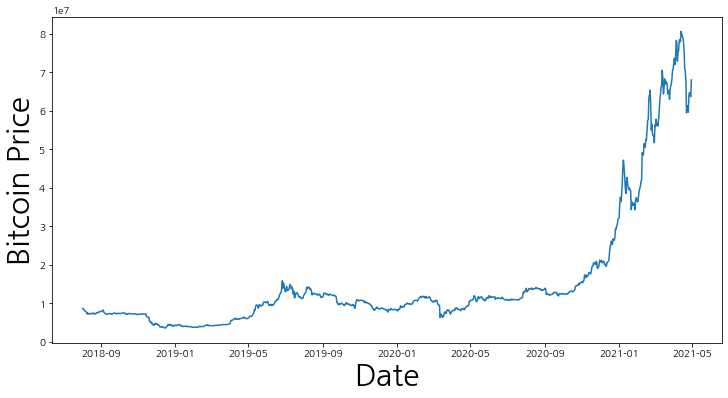

In [13]:
fig = plt.figure(figsize=(12,6))
plt.plot(Bitcoin['날짜'],Bitcoin['종가']) 
plt.xlabel('Date', fontsize=30)
plt.ylabel('Bitcoin Price',fontsize=30)
plt.show()

In [14]:
# 날짜를 id로 타겟변수 데이터셋 생성

Bitcoin = Bitcoin[['날짜', '종가', '변동 %']]
Bitcoin.head()

,날짜,종가,변동 %
0,2021-04-30,68075000.0,6.85%
1,2021-04-29,63710000.0,-0.63%
2,2021-04-28,64116000.0,-0.96%
3,2021-04-27,64738000.0,0.84%
4,2021-04-26,64196000.0,7.54%


In [15]:
# 다른 변수의 변동률과 구분하기 위해 변수명 변경

Bitcoin = Bitcoin.rename({'변동 %': '비트코인_변동률'}, axis='columns')
Bitcoin.head()

,날짜,종가,비트코인_변동률
0,2021-04-30,68075000.0,6.85%
1,2021-04-29,63710000.0,-0.63%
2,2021-04-28,64116000.0,-0.96%
3,2021-04-27,64738000.0,0.84%
4,2021-04-26,64196000.0,7.54%


In [16]:
# 중복 확인 → 없음

duplicateDF = Bitcoin[Bitcoin['날짜'].duplicated()]
duplicateDF

,날짜,종가,비트코인_변동률


### 원자재

In [17]:
# 필요한 변수만 뽑아 데이터셋으로 생성

Copper = Copper[['날짜', '등락률']]
Gold = Gold[['날짜', '등락률']]
Oil = Oil[['날짜', '등락률']]
Silver = Silver[['날짜', '등락률']]

In [18]:
# JOIN을 위해 날짜 형식 변환

Copper['날짜'] = pd.to_datetime(Copper['날짜'])
Gold['날짜'] = pd.to_datetime(Gold['날짜'])
Oil['날짜'] = pd.to_datetime(Oil['날짜'])
Silver['날짜'] = pd.to_datetime(Silver['날짜'])

In [19]:
# 원자재 데이터셋 합치기

Bit = pd.merge(Bitcoin, Copper, left_on='날짜', right_on='날짜', how='left')
Bit = Bit.rename({'등락률': '구리_변동률'}, axis=1)

Bit = pd.merge(Bit, Gold, left_on='날짜', right_on='날짜', how='left')
Bit = Bit.rename({'등락률': '금_변동률'}, axis=1)

Bit = pd.merge(Bit, Oil, left_on='날짜', right_on='날짜', how='left')
Bit = Bit.rename({'등락률': '석유_변동률'}, axis=1)

Bit = pd.merge(Bit, Silver, left_on='날짜', right_on='날짜', how='left')
Bit = Bit.rename({'등락률': '은_변동률'}, axis=1)

In [20]:
Bit

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률
0,2021-04-30,68075000.0,6.85%,-0.41%,-0.04%,-2.27%,-0.41%
1,2021-04-29,63710000.0,-0.63%,1.60%,-0.30%,1.90%,1.60%
2,2021-04-28,64116000.0,-0.96%,-0.67%,-0.26%,1.59%,-0.67%
3,2021-04-27,64738000.0,0.84%,1.44%,-0.06%,1.45%,1.44%
4,2021-04-26,64196000.0,7.54%,2.23%,0.11%,-0.79%,2.23%
...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,0.27%,NaN,NaN,NaN,NaN
998,2018-08-04,8058000.0,-4.91%,NaN,NaN,NaN,NaN
999,2018-08-03,8474000.0,-2.31%,1.72%,0.29%,-0.42%,1.72%
1000,2018-08-02,8674000.0,-0.13%,-1.21%,-0.59%,1.93%,-1.21%


In [21]:
Bit.info()
# 변수별 데이터의 개수가 다름
# 비트코인: 1002개, 구리: 691개, 금: 690개, 석유: 690개, 은: 691개

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        1002 non-null   datetime64[ns]
 1   종가        1002 non-null   float64       
 2   비트코인_변동률  1002 non-null   object        
 3   구리_변동률    691 non-null    object        
 4   금_변동률     690 non-null    object        
 5   석유_변동률    690 non-null    object        
 6   은_변동률     691 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 62.6+ KB


### 주식 데이터

In [22]:
# 필요한 변수만 뽑아 데이터셋으로 생성

Skhynix = Skhynix[['날짜', '등락률']]
Samsung = Samsung[['날짜', '등락률']]
Soulbrain = Soulbrain[['날짜', '등락률']]
Adtek = Adtek[['일자', '등락률']]
Oceanbridge = Oceanbridge[['날짜', '등락률']]
Ips = Ips[['날짜', '등락률']]
Eugenetech = Eugenetech[['날짜', '등락률']]

In [23]:
# JOIN을 위해 날짜 형식 변환

Skhynix['날짜'] = pd.to_datetime(Skhynix['날짜'])
Samsung['날짜'] = pd.to_datetime(Samsung['날짜'])
Soulbrain['날짜'] = pd.to_datetime(Soulbrain['날짜'])
Adtek['일자'] = pd.to_datetime(Adtek['일자'])
Oceanbridge['날짜'] = pd.to_datetime(Oceanbridge['날짜'])
Ips['날짜'] = pd.to_datetime(Ips['날짜'])
Eugenetech['날짜'] = pd.to_datetime(Eugenetech['날짜'])

In [24]:
Bit2 = pd.merge(Bit, Skhynix, left_on='날짜', right_on='날짜', how='left')
Bit2 = Bit2.rename({'등락률': 'SK하이_변동률'}, axis=1)

Bit2 = pd.merge(Bit2, Samsung, left_on='날짜', right_on='날짜', how='left')
Bit2 = Bit2.rename({'등락률': '삼성_변동률'}, axis=1)

Bit2 = pd.merge(Bit2, Soulbrain, left_on='날짜', right_on='날짜', how='left')
Bit2 = Bit2.rename({'등락률': '솔브_변동률'}, axis=1)

Bit2 = pd.merge(Bit2, Adtek, left_on='날짜', right_on='일자', how='left')
Bit2 = Bit2.rename({'등락률': '에이디텍_변동률'}, axis=1)

Bit2 = pd.merge(Bit2, Oceanbridge, left_on='날짜', right_on='날짜', how='left')
Bit2 = Bit2.rename({'등락률': '오션_변동률'}, axis=1)

Bit2 = pd.merge(Bit2, Ips, left_on='날짜', right_on='날짜', how='left')
Bit2 = Bit2.rename({'등락률': 'Ips_변동률'}, axis=1)

Bit2 = pd.merge(Bit2, Eugenetech, left_on='날짜', right_on='날짜', how='left')
Bit2 = Bit2.rename({'등락률': '유진_변동률'}, axis=1)

Bit2

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,일자,에이디텍_변동률,오션_변동률,Ips_변동률,유진_변동률
0,2021-04-30,68075000.0,6.85%,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,2021-04-30,-0.80,-1.07,0.79,0.21
1,2021-04-29,63710000.0,-0.63%,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,2021-04-29,0.20,0.00,-3.26,-0.21
2,2021-04-28,64116000.0,-0.96%,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,2021-04-28,-2.91,-3.61,-2.80,-5.70
3,2021-04-27,64738000.0,0.84%,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,2021-04-27,-1.34,-1.27,-4.11,-2.68
4,2021-04-26,64196000.0,7.54%,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,2021-04-26,-0.76,-0.25,-1.06,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,0.27%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
998,2018-08-04,8058000.0,-4.91%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
999,2018-08-03,8474000.0,-2.31%,1.72%,0.29%,-0.42%,1.72%,0.12,0.44,NaN,2018-08-03,2.33,-0.11,4.17,-3.43
1000,2018-08-02,8674000.0,-0.13%,-1.21%,-0.59%,1.93%,-1.21%,-2.80,-2.15,NaN,2018-08-02,0.00,0.68,-4.34,-3.89


In [25]:
# 날짜 변수와 값이 같은 일자 변수 제거

Bit2 = Bit2.drop(['일자'], axis=1)

In [26]:
Bit2.info()

# 솔브_변동률은 데이터가 181개만 존재 
# Soulbrain 기업이 설립된지 얼마 되지 않았기 때문

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   날짜        1002 non-null   datetime64[ns]
 1   종가        1002 non-null   float64       
 2   비트코인_변동률  1002 non-null   object        
 3   구리_변동률    691 non-null    object        
 4   금_변동률     690 non-null    object        
 5   석유_변동률    690 non-null    object        
 6   은_변동률     691 non-null    object        
 7   SK하이_변동률  675 non-null    float64       
 8   삼성_변동률    675 non-null    float64       
 9   솔브_변동률    181 non-null    float64       
 10  에이디텍_변동률  675 non-null    float64       
 11  오션_변동률    675 non-null    float64       
 12  Ips_변동률   675 non-null    float64       
 13  유진_변동률    675 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 117.4+ KB


### 트렌드지수

In [27]:
GoogleTrend = GoogleTrend[['날짜', 'bitcoin', 'virtualcurrency', 'cryptocurrency', 'coin']]
GoogleTrend

,날짜,bitcoin,virtualcurrency,cryptocurrency,coin
0,2018.8.1,5,4,22,12
1,2018.8.2,5,4,22,12
2,2018.8.3,5,4,22,12
3,2018.8.4,5,4,22,12
4,2018.8.5,8,5,15,15
...,...,...,...,...,...
999,2021.4.26,52,11,40,44
1000,2021.4.27,52,11,40,44
1001,2021.4.28,52,11,40,44
1002,2021.4.29,52,11,40,44


In [28]:
# JOIN을 위해 날짜 형식 변환

GoogleTrend['날짜'] = pd.to_datetime(GoogleTrend['날짜'])
NaverTrend['날짜'] = pd.to_datetime(NaverTrend['날짜'])

In [29]:
Bit2 = pd.merge(Bit2, GoogleTrend, left_on='날짜', right_on='날짜', how='left')
Bit2 = Bit2.rename({'bitcoin': '비트코인_구글트렌드지수', 'virtualcurrency': '가상화폐_구글트렌드지수', 
                    'cryptocurrency': '암호화폐_구글트렌드지수', 'coin': '코인_구글트렌드지수'}, axis=1)
Bit2 = pd.merge(Bit2, NaverTrend, left_on='날짜', right_on='날짜', how='left')
Bit2 = Bit2.rename({'비트코인': '비트코인_네이버트렌드지수', '가상화폐': '가상화폐_네이버트렌드지수', 
                    '암호화폐': '암호화폐_네이버트렌드지수', '블록체인': '블록체인_네이버트렌드지수'}, axis=1)
Bit2

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,Ips_변동률,유진_변동률,비트코인_구글트렌드지수,가상화폐_구글트렌드지수,암호화폐_구글트렌드지수,코인_구글트렌드지수,비트코인_네이버트렌드지수,가상화폐_네이버트렌드지수,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수
0,2021-04-30,68075000.0,6.85%,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,0.79,0.21,52,11,40,44,3.71583,0.35487,0.05652,0.08400
1,2021-04-29,63710000.0,-0.63%,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,-3.26,-0.21,52,11,40,44,5.01987,0.48500,0.07423,0.08915
2,2021-04-28,64116000.0,-0.96%,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,-2.80,-5.70,52,11,40,44,7.49125,0.93133,0.12597,0.07990
3,2021-04-27,64738000.0,0.84%,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,-4.11,-2.68,52,11,40,44,7.58304,0.82462,0.11857,0.04106
4,2021-04-26,64196000.0,7.54%,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,-1.06,1.55,52,11,40,44,9.94925,1.03235,0.15065,0.06996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,0.27%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8,5,15,15,0.42613,0.25140,0.05534,0.05513
998,2018-08-04,8058000.0,-4.91%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5,4,22,12,0.38568,0.20130,0.04867,0.05194
999,2018-08-03,8474000.0,-2.31%,1.72%,0.29%,-0.42%,1.72%,0.12,0.44,NaN,...,4.17,-3.43,5,4,22,12,0.49276,0.37434,0.07426,0.08163
1000,2018-08-02,8674000.0,-0.13%,-1.21%,-0.59%,1.93%,-1.21%,-2.80,-2.15,NaN,...,-4.34,-3.89,5,4,22,12,0.43487,0.30010,0.06153,0.08812


In [30]:
Bit2

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,Ips_변동률,유진_변동률,비트코인_구글트렌드지수,가상화폐_구글트렌드지수,암호화폐_구글트렌드지수,코인_구글트렌드지수,비트코인_네이버트렌드지수,가상화폐_네이버트렌드지수,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수
0,2021-04-30,68075000.0,6.85%,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,0.79,0.21,52,11,40,44,3.71583,0.35487,0.05652,0.08400
1,2021-04-29,63710000.0,-0.63%,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,-3.26,-0.21,52,11,40,44,5.01987,0.48500,0.07423,0.08915
2,2021-04-28,64116000.0,-0.96%,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,-2.80,-5.70,52,11,40,44,7.49125,0.93133,0.12597,0.07990
3,2021-04-27,64738000.0,0.84%,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,-4.11,-2.68,52,11,40,44,7.58304,0.82462,0.11857,0.04106
4,2021-04-26,64196000.0,7.54%,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,-1.06,1.55,52,11,40,44,9.94925,1.03235,0.15065,0.06996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,0.27%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,8,5,15,15,0.42613,0.25140,0.05534,0.05513
998,2018-08-04,8058000.0,-4.91%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5,4,22,12,0.38568,0.20130,0.04867,0.05194
999,2018-08-03,8474000.0,-2.31%,1.72%,0.29%,-0.42%,1.72%,0.12,0.44,NaN,...,4.17,-3.43,5,4,22,12,0.49276,0.37434,0.07426,0.08163
1000,2018-08-02,8674000.0,-0.13%,-1.21%,-0.59%,1.93%,-1.21%,-2.80,-2.15,NaN,...,-4.34,-3.89,5,4,22,12,0.43487,0.30010,0.06153,0.08812


In [31]:
Bit2['비트코인_네이버트렌드지수'] = Bit2['비트코인_네이버트렌드지수'].shift(-1)
Bit2['가상화폐_네이버트렌드지수'] = Bit2['가상화폐_네이버트렌드지수'].shift(-1)
Bit2['암호화폐_네이버트렌드지수'] = Bit2['암호화폐_네이버트렌드지수'].shift(-1)
Bit2['블록체인_네이버트렌드지수'] = Bit2['블록체인_네이버트렌드지수'].shift(-1)

### 감성지수

#### Granger Causality Test

In [32]:
Community['날짜'] = pd.to_datetime(Community['날짜'])
News['날짜'] = pd.to_datetime(News['날짜'])

In [33]:
Bit3 = pd.merge(Bit2, Community, left_on='날짜', right_on='날짜', how='left')
Bit3 = pd.merge(Bit3, News, left_on='날짜', right_on='날짜', how='left')
Bit3

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,암호화폐_구글트렌드지수,코인_구글트렌드지수,비트코인_네이버트렌드지수,가상화폐_네이버트렌드지수,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,뉴스_변동성_크기,뉴스_변동성_방향
0,2021-04-30,68075000.0,6.85%,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,40,44,5.01987,0.48500,0.07423,0.08915,NaN,0.320000,1.642473,2.565217
1,2021-04-29,63710000.0,-0.63%,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,40,44,7.49125,0.93133,0.12597,0.07990,1.000000,-0.200000,1.863524,14.307692
2,2021-04-28,64116000.0,-0.96%,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,40,44,7.58304,0.82462,0.11857,0.04106,0.571429,-0.523810,1.805721,17.266667
3,2021-04-27,64738000.0,0.84%,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,40,44,9.94925,1.03235,0.15065,0.06996,0.142857,-0.037037,2.504559,-69.058824
4,2021-04-26,64196000.0,7.54%,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,40,44,8.04654,0.73967,0.11029,0.07602,0.428571,0.568627,1.931937,4.126437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,0.27%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,15,0.38568,0.20130,0.04867,0.05194,-0.538462,-0.085714,6.900000,1.833333
998,2018-08-04,8058000.0,-4.91%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,12,0.49276,0.37434,0.07426,0.08163,-0.250000,-0.180328,2.228070,1.890625
999,2018-08-03,8474000.0,-2.31%,1.72%,0.29%,-0.42%,1.72%,0.12,0.44,NaN,...,22,12,0.43487,0.30010,0.06153,0.08812,0.000000,-0.609756,2.125000,3.000000
1000,2018-08-02,8674000.0,-0.13%,-1.21%,-0.59%,1.93%,-1.21%,-2.80,-2.15,NaN,...,22,12,0.60924,0.38049,0.07560,0.07793,0.294118,-0.500000,56.000000,-17.625000


In [34]:
# https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6
# https://wikidocs.net/35332

maxlag=2

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    import scipy.stats as ss
    from statsmodels.tsa.stattools import grangercausalitytests

    data = data[variables]
    data = data.fillna(method='bfill')
    data = data.reset_index(drop=True)
    print(data.shape)
    print(data.head())

    for c in range(len(variables)):
        col = variables[c]
        if data[col].dtype == 'O':
            data[col] = [s.replace('%', '') for s in data[col]]
            data[col] = pd.to_numeric(data[col])
        data[col] = ss.zscore(data[col])
    

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset 

In [35]:
cname = ['비트코인_변동률', '커뮤니티_변동성_크기', '커뮤니티_변동성_방향',
         '뉴스_변동성_크기', '뉴스_변동성_방향']

In [36]:
grangers_causality_matrix(Bit3, variables = cname) 

(1002, 5)
  비트코인_변동률  커뮤니티_변동성_크기  커뮤니티_변동성_방향  뉴스_변동성_크기  뉴스_변동성_방향
0    6.85%     1.000000     0.320000   1.642473   2.565217
1   -0.63%     1.000000    -0.200000   1.863524  14.307692
2   -0.96%     0.571429    -0.523810   1.805721  17.266667
3    0.84%     0.142857    -0.037037   2.504559 -69.058824
4    7.54%     0.428571     0.568627   1.931937   4.126437


,비트코인_변동률_x,커뮤니티_변동성_크기_x,커뮤니티_변동성_방향_x,뉴스_변동성_크기_x,뉴스_변동성_방향_x
비트코인_변동률_y,1.0000,0.7049,0.6960,0.9281,0.8147
커뮤니티_변동성_크기_y,0.3954,1.0000,0.3821,0.3397,0.3315
커뮤니티_변동성_방향_y,0.6590,0.5589,1.0000,0.4706,0.6672
뉴스_변동성_크기_y,0.5856,0.5491,0.6320,1.0000,0.3058
뉴스_변동성_방향_y,0.9684,0.1790,0.4204,0.8107,1.0000


- 행에 위치한 변수는 response(y), 열에 위치한 변수는 predictor series(x)이다.   
- 유의수준 0.05 하에서 어떤 변수도 변동률을 직접적으로 일으키지는(cause) 않는 것을 확인하였다.

#### 병합

In [37]:
Community

,날짜,커뮤니티_변동성_크기,커뮤니티_변동성_방향
0,2021-04-30,NaN,0.320000
1,2021-04-29,1.000000,-0.200000
2,2021-04-28,0.571429,-0.523810
3,2021-04-27,0.142857,-0.037037
4,2021-04-26,0.428571,0.568627
...,...,...,...
954,2018-08-05,-0.538462,-0.085714
955,2018-08-04,-0.250000,-0.180328
956,2018-08-03,0.000000,-0.609756
957,2018-08-02,0.294118,-0.500000


In [38]:
# 전날의 감성지수 반영하기 위해 행을 하나씩 이동

Community['커뮤니티_변동성_크기'] = Community['커뮤니티_변동성_크기'].shift(-1)
Community['커뮤니티_변동성_방향'] = Community['커뮤니티_변동성_방향'].shift(-1)

In [39]:
Community

,날짜,커뮤니티_변동성_크기,커뮤니티_변동성_방향
0,2021-04-30,1.000000,-0.200000
1,2021-04-29,0.571429,-0.523810
2,2021-04-28,0.142857,-0.037037
3,2021-04-27,0.428571,0.568627
4,2021-04-26,0.714286,0.200000
...,...,...,...
954,2018-08-05,-0.250000,-0.180328
955,2018-08-04,0.000000,-0.609756
956,2018-08-03,0.294118,-0.500000
957,2018-08-02,0.000000,-0.296552


In [40]:
Community['커뮤니티_변동성_크기_전날+전전날'] = ""

In [41]:
i=0
while i < len(Community['커뮤니티_변동성_크기_전날+전전날'])-1:
    Community['커뮤니티_변동성_크기_전날+전전날'][i] = Community['커뮤니티_변동성_크기'][i]+Community['커뮤니티_변동성_크기'][i+1]
    i += 1

In [42]:
Community['커뮤니티_변동성_크기_전날+전전날'] = Community['커뮤니티_변동성_크기_전날+전전날'].apply(pd.to_numeric)

In [43]:
Community['커뮤니티_변동성_방향_전날+전전날'] = ""

In [44]:
i=0
while i < len(Community['커뮤니티_변동성_방향_전날+전전날'])-1:
    Community['커뮤니티_변동성_방향_전날+전전날'][i] = Community['커뮤니티_변동성_방향'][i]+Community['커뮤니티_변동성_방향'][i+1]
    i += 1

In [45]:
Community['커뮤니티_변동성_방향_전날+전전날'] = Community['커뮤니티_변동성_방향_전날+전전날'].apply(pd.to_numeric)

In [46]:
Community

,날짜,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날
0,2021-04-30,1.000000,-0.200000,1.571429,-0.723810
1,2021-04-29,0.571429,-0.523810,0.714286,-0.560847
2,2021-04-28,0.142857,-0.037037,0.571429,0.531590
3,2021-04-27,0.428571,0.568627,1.142857,0.768627
4,2021-04-26,0.714286,0.200000,1.714286,0.342857
...,...,...,...,...,...
954,2018-08-05,-0.250000,-0.180328,-0.250000,-0.790084
955,2018-08-04,0.000000,-0.609756,0.294118,-1.109756
956,2018-08-03,0.294118,-0.500000,0.294118,-0.796552
957,2018-08-02,0.000000,-0.296552,NaN,NaN


In [47]:
# 전날의 감성지수 반영하기 위해 행을 하나씩 이동
News['뉴스_변동성_크기'] = News['뉴스_변동성_크기'].shift(-1)
News['뉴스_변동성_방향'] = News['뉴스_변동성_방향'].shift(-1)

In [48]:
News

,날짜,뉴스_변동성_크기,뉴스_변동성_방향
0,2021-04-30,1.863524,14.307692
1,2021-04-29,1.805721,17.266667
2,2021-04-28,2.504559,-69.058824
3,2021-04-27,1.931937,4.126437
4,2021-04-26,1.484293,9.473684
...,...,...,...
997,2018-08-05,2.228070,1.890625
998,2018-08-04,2.125000,3.000000
999,2018-08-03,56.000000,-17.625000
1000,2018-08-02,-6.500000,-0.875000


In [49]:
News['뉴스_변동성_크기_전날+전전날'] = ""

In [50]:
i=0
while i < len(News['뉴스_변동성_크기_전날+전전날'])-1:
    News['뉴스_변동성_크기_전날+전전날'][i] = News['뉴스_변동성_크기'][i]+News['뉴스_변동성_크기'][i+1]
    i += 1

In [51]:
News['뉴스_변동성_크기_전날+전전날'] = News['뉴스_변동성_크기_전날+전전날'].apply(pd.to_numeric)

In [52]:
News['뉴스_변동성_방향_전날+전전날'] = ""

In [53]:
i=0
while i < len(News['뉴스_변동성_방향_전날+전전날'])-1:
    News['뉴스_변동성_방향_전날+전전날'][i] = News['뉴스_변동성_방향'][i]+News['뉴스_변동성_방향'][i+1]
    i += 1

In [54]:
News['뉴스_변동성_방향_전날+전전날'] = News['뉴스_변동성_방향_전날+전전날'].apply(pd.to_numeric)

In [55]:
News

,날짜,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
0,2021-04-30,1.863524,14.307692,3.669245,31.574359
1,2021-04-29,1.805721,17.266667,4.310280,-51.792157
2,2021-04-28,2.504559,-69.058824,4.436496,-64.932387
3,2021-04-27,1.931937,4.126437,3.416230,13.600121
4,2021-04-26,1.484293,9.473684,3.376084,17.110048
...,...,...,...,...,...
997,2018-08-05,2.228070,1.890625,4.353070,4.890625
998,2018-08-04,2.125000,3.000000,58.125000,-14.625000
999,2018-08-03,56.000000,-17.625000,49.500000,-18.500000
1000,2018-08-02,-6.500000,-0.875000,NaN,NaN


In [56]:
Bit3 = pd.merge(Bit2, Community, left_on='날짜', right_on='날짜', how='left')
Bit3 = pd.merge(Bit3, News, left_on='날짜', right_on='날짜', how='left')
Bit3

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
0,2021-04-30,68075000.0,6.85%,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,0.07423,0.08915,1.000000,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359
1,2021-04-29,63710000.0,-0.63%,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,0.12597,0.07990,0.571429,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157
2,2021-04-28,64116000.0,-0.96%,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,0.11857,0.04106,0.142857,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387
3,2021-04-27,64738000.0,0.84%,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,0.15065,0.06996,0.428571,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121
4,2021-04-26,64196000.0,7.54%,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,0.11029,0.07602,0.714286,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,0.27%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04867,0.05194,-0.250000,-0.180328,-0.250000,-0.790084,2.228070,1.890625,4.353070,4.890625
998,2018-08-04,8058000.0,-4.91%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07426,0.08163,0.000000,-0.609756,0.294118,-1.109756,2.125000,3.000000,58.125000,-14.625000
999,2018-08-03,8474000.0,-2.31%,1.72%,0.29%,-0.42%,1.72%,0.12,0.44,NaN,...,0.06153,0.08812,0.294118,-0.500000,0.294118,-0.796552,56.000000,-17.625000,49.500000,-18.500000
1000,2018-08-02,8674000.0,-0.13%,-1.21%,-0.59%,1.93%,-1.21%,-2.80,-2.15,NaN,...,0.07560,0.07793,0.000000,-0.296552,NaN,NaN,-6.500000,-0.875000,NaN,NaN


### 타겟 변수 범주화

In [57]:
# 결측치가 있는 데이터셋

df = Bit3
df

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
0,2021-04-30,68075000.0,6.85%,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,0.07423,0.08915,1.000000,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359
1,2021-04-29,63710000.0,-0.63%,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,0.12597,0.07990,0.571429,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157
2,2021-04-28,64116000.0,-0.96%,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,0.11857,0.04106,0.142857,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387
3,2021-04-27,64738000.0,0.84%,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,0.15065,0.06996,0.428571,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121
4,2021-04-26,64196000.0,7.54%,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,0.11029,0.07602,0.714286,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,0.27%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04867,0.05194,-0.250000,-0.180328,-0.250000,-0.790084,2.228070,1.890625,4.353070,4.890625
998,2018-08-04,8058000.0,-4.91%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07426,0.08163,0.000000,-0.609756,0.294118,-1.109756,2.125000,3.000000,58.125000,-14.625000
999,2018-08-03,8474000.0,-2.31%,1.72%,0.29%,-0.42%,1.72%,0.12,0.44,NaN,...,0.06153,0.08812,0.294118,-0.500000,0.294118,-0.796552,56.000000,-17.625000,49.500000,-18.500000
1000,2018-08-02,8674000.0,-0.13%,-1.21%,-0.59%,1.93%,-1.21%,-2.80,-2.15,NaN,...,0.07560,0.07793,0.000000,-0.296552,NaN,NaN,-6.500000,-0.875000,NaN,NaN


In [58]:
# 결측치가 없는 데이터셋
# ** 이렇게 적은 이유는 아까 데이터 탐색하며 발견했던 솔브레인 주식 데이터 때문
# (데이터가 2020년 8월부터 있음) -> 변수 제거 해야 함 **

Df = df.dropna(how='any')
Df

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
0,2021-04-30,68075000.0,6.85%,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,0.07423,0.08915,1.000000,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359
1,2021-04-29,63710000.0,-0.63%,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,0.12597,0.07990,0.571429,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157
2,2021-04-28,64116000.0,-0.96%,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,0.11857,0.04106,0.142857,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387
3,2021-04-27,64738000.0,0.84%,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,0.15065,0.06996,0.428571,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121
4,2021-04-26,64196000.0,7.54%,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,0.11029,0.07602,0.714286,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2020-08-12,13681000.0,0.52%,0.35%,0.11%,1.36%,0.35%,-0.37,1.37,2.90,...,0.01695,0.04051,0.666667,-0.423077,-0.333333,0.132479,2.489362,2.163636,10.989362,5.810695
262,2020-08-11,13610000.0,-2.76%,-0.10%,-4.53%,-0.91%,-0.10%,-0.12,0.69,-6.19,...,0.02113,0.04033,-1.000000,0.555556,-0.606061,0.041537,8.500000,3.647059,-2.000000,7.147059
263,2020-08-10,13997000.0,1.33%,-1.15%,0.71%,1.03%,-1.15%,0.99,0.52,-8.90,...,0.01398,0.02659,0.393939,-0.514019,0.424242,-0.014019,-10.500000,3.500000,-8.342105,5.129630
266,2020-08-07,13762000.0,-0.74%,-0.26%,-2.01%,-0.64%,-0.26%,-0.62,-0.86,7.63,...,0.01655,0.03551,-0.500000,0.076923,-0.500000,0.099145,5.692308,1.875000,11.902834,3.445248


In [59]:
# % 제거

df['비트코인_변동률'] = df['비트코인_변동률'].str.replace('%', '')
df

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
0,2021-04-30,68075000.0,6.85,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,0.07423,0.08915,1.000000,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359
1,2021-04-29,63710000.0,-0.63,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,0.12597,0.07990,0.571429,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157
2,2021-04-28,64116000.0,-0.96,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,0.11857,0.04106,0.142857,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387
3,2021-04-27,64738000.0,0.84,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,0.15065,0.06996,0.428571,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121
4,2021-04-26,64196000.0,7.54,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,0.11029,0.07602,0.714286,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04867,0.05194,-0.250000,-0.180328,-0.250000,-0.790084,2.228070,1.890625,4.353070,4.890625
998,2018-08-04,8058000.0,-4.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07426,0.08163,0.000000,-0.609756,0.294118,-1.109756,2.125000,3.000000,58.125000,-14.625000
999,2018-08-03,8474000.0,-2.31,1.72%,0.29%,-0.42%,1.72%,0.12,0.44,NaN,...,0.06153,0.08812,0.294118,-0.500000,0.294118,-0.796552,56.000000,-17.625000,49.500000,-18.500000
1000,2018-08-02,8674000.0,-0.13,-1.21%,-0.59%,1.93%,-1.21%,-2.80,-2.15,NaN,...,0.07560,0.07793,0.000000,-0.296552,NaN,NaN,-6.500000,-0.875000,NaN,NaN


In [60]:
# 모델링을 위해 수치형으로 변환

df['비트코인_변동률'] = pd.to_numeric(df['비트코인_변동률'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   날짜                  1002 non-null   datetime64[ns]
 1   종가                  1002 non-null   float64       
 2   비트코인_변동률            1002 non-null   float64       
 3   구리_변동률              691 non-null    object        
 4   금_변동률               690 non-null    object        
 5   석유_변동률              690 non-null    object        
 6   은_변동률               691 non-null    object        
 7   SK하이_변동률            675 non-null    float64       
 8   삼성_변동률              675 non-null    float64       
 9   솔브_변동률              181 non-null    float64       
 10  에이디텍_변동률            675 non-null    float64       
 11  오션_변동률              675 non-null    float64       
 12  Ips_변동률             675 non-null    float64       
 13  유진_변동률              675 non-null    float64     

- 2차 상승 랠리로 보이는 시점과 코로나 국내 발생 시점이 유사한 것으로 보이며, 이 때 변동성이 크게 증가한 후 이전 시점과 유사하게 진행되는 것을 볼 수 있다.

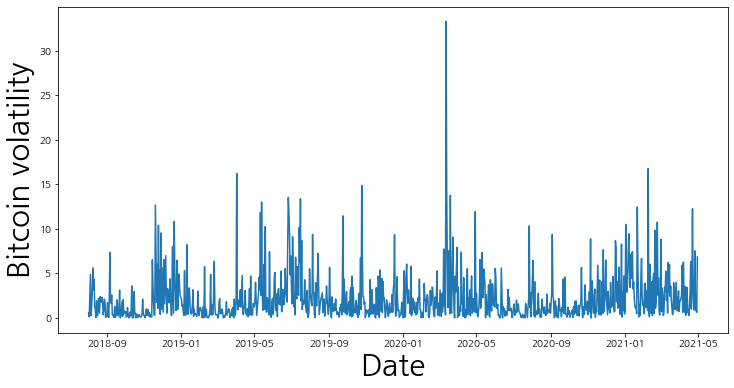

In [61]:
fig = plt.figure(figsize=(12,6))
plt.plot(df['날짜'],df['비트코인_변동률'].abs()) 
plt.xlabel('Date', fontsize=30)
plt.ylabel('Bitcoin volatility',fontsize=30)
plt.show()

In [62]:
# 타겟 변수 범주화

df['비트코인_변동률'] = df['비트코인_변동률'].apply(lambda x: 0 if x < -1.314 else 1 if -1.314<= x <0 else 2 if 0<= x <=1.7 else 3)

In [63]:
df

,날짜,종가,비트코인_변동률,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
0,2021-04-30,68075000.0,3,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,0.07423,0.08915,1.000000,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359
1,2021-04-29,63710000.0,1,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,0.12597,0.07990,0.571429,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157
2,2021-04-28,64116000.0,1,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,0.11857,0.04106,0.142857,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387
3,2021-04-27,64738000.0,2,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,0.15065,0.06996,0.428571,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121
4,2021-04-26,64196000.0,3,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,0.11029,0.07602,0.714286,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04867,0.05194,-0.250000,-0.180328,-0.250000,-0.790084,2.228070,1.890625,4.353070,4.890625
998,2018-08-04,8058000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07426,0.08163,0.000000,-0.609756,0.294118,-1.109756,2.125000,3.000000,58.125000,-14.625000
999,2018-08-03,8474000.0,0,1.72%,0.29%,-0.42%,1.72%,0.12,0.44,NaN,...,0.06153,0.08812,0.294118,-0.500000,0.294118,-0.796552,56.000000,-17.625000,49.500000,-18.500000
1000,2018-08-02,8674000.0,1,-1.21%,-0.59%,1.93%,-1.21%,-2.80,-2.15,NaN,...,0.07560,0.07793,0.000000,-0.296552,NaN,NaN,-6.500000,-0.875000,NaN,NaN


In [64]:
df = df.rename({'비트코인_변동률': '비트코인_변동'}, axis=1)
df.head()

,날짜,종가,비트코인_변동,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
0,2021-04-30,68075000.0,3,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,0.07423,0.08915,1.000000,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359
1,2021-04-29,63710000.0,1,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,0.12597,0.07990,0.571429,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157
2,2021-04-28,64116000.0,1,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,0.11857,0.04106,0.142857,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387
3,2021-04-27,64738000.0,2,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,0.15065,0.06996,0.428571,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121
4,2021-04-26,64196000.0,3,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,0.11029,0.07602,0.714286,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   날짜                  1002 non-null   datetime64[ns]
 1   종가                  1002 non-null   float64       
 2   비트코인_변동             1002 non-null   int64         
 3   구리_변동률              691 non-null    object        
 4   금_변동률               690 non-null    object        
 5   석유_변동률              690 non-null    object        
 6   은_변동률               691 non-null    object        
 7   SK하이_변동률            675 non-null    float64       
 8   삼성_변동률              675 non-null    float64       
 9   솔브_변동률              181 non-null    float64       
 10  에이디텍_변동률            675 non-null    float64       
 11  오션_변동률              675 non-null    float64       
 12  Ips_변동률             675 non-null    float64       
 13  유진_변동률              675 non-null    float64     

In [66]:
df

,날짜,종가,비트코인_변동,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,솔브_변동률,...,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
0,2021-04-30,68075000.0,3,-0.41%,-0.04%,-2.27%,-0.41%,-1.54,-0.24,1.66,...,0.07423,0.08915,1.000000,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359
1,2021-04-29,63710000.0,1,1.60%,-0.30%,1.90%,1.60%,0.00,-0.49,2.25,...,0.12597,0.07990,0.571429,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157
2,2021-04-28,64116000.0,1,-0.67%,-0.26%,1.59%,-0.67%,-3.70,-0.97,-2.48,...,0.11857,0.04106,0.142857,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387
3,2021-04-27,64738000.0,2,1.44%,-0.06%,1.45%,1.44%,2.66,-0.72,-1.60,...,0.15065,0.06996,0.428571,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121
4,2021-04-26,64196000.0,3,2.23%,0.11%,-0.79%,2.23%,-0.75,0.85,5.97,...,0.11029,0.07602,0.714286,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2018-08-05,8080000.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04867,0.05194,-0.250000,-0.180328,-0.250000,-0.790084,2.228070,1.890625,4.353070,4.890625
998,2018-08-04,8058000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.07426,0.08163,0.000000,-0.609756,0.294118,-1.109756,2.125000,3.000000,58.125000,-14.625000
999,2018-08-03,8474000.0,0,1.72%,0.29%,-0.42%,1.72%,0.12,0.44,NaN,...,0.06153,0.08812,0.294118,-0.500000,0.294118,-0.796552,56.000000,-17.625000,49.500000,-18.500000
1000,2018-08-02,8674000.0,1,-1.21%,-0.59%,1.93%,-1.21%,-2.80,-2.15,NaN,...,0.07560,0.07793,0.000000,-0.296552,NaN,NaN,-6.500000,-0.875000,NaN,NaN


In [67]:
# 수치형으로 만들기 위해 %문자 제거

df['구리_변동률'] = df['구리_변동률'].str.replace('%', '')
df['금_변동률'] = df['금_변동률'].str.replace('%', '')
df['석유_변동률'] = df['석유_변동률'].str.replace('%', '')
df['은_변동률'] = df['은_변동률'].str.replace('%', '')

In [68]:
# 모델링을 위해 수치형으로 변환 

df['구리_변동률'] = pd.to_numeric(df['구리_변동률'])
df['금_변동률'] = pd.to_numeric(df['금_변동률'])
df['석유_변동률'] = pd.to_numeric(df['석유_변동률'])
df['은_변동률'] = pd.to_numeric(df['은_변동률'])

In [69]:
# 모델링을 위해 솔브 변수 (결측치 많음) 제거

df = df.drop(['솔브_변동률'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002 entries, 0 to 1001
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   날짜                  1002 non-null   datetime64[ns]
 1   종가                  1002 non-null   float64       
 2   비트코인_변동             1002 non-null   int64         
 3   구리_변동률              691 non-null    float64       
 4   금_변동률               690 non-null    float64       
 5   석유_변동률              690 non-null    float64       
 6   은_변동률               691 non-null    float64       
 7   SK하이_변동률            675 non-null    float64       
 8   삼성_변동률              675 non-null    float64       
 9   에이디텍_변동률            675 non-null    float64       
 10  오션_변동률              675 non-null    float64       
 11  Ips_변동률             675 non-null    float64       
 12  유진_변동률              675 non-null    float64       
 13  비트코인_구글트렌드지수        1002 non-null   int64       

In [70]:
# 결측치 제거

df.dropna(how='any', inplace=True)
df

,날짜,종가,비트코인_변동,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,에이디텍_변동률,...,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
0,2021-04-30,68075000.0,3,-0.41,-0.04,-2.27,-0.41,-1.54,-0.24,-0.80,...,0.07423,0.08915,1.000000,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359
1,2021-04-29,63710000.0,1,1.60,-0.30,1.90,1.60,0.00,-0.49,0.20,...,0.12597,0.07990,0.571429,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157
2,2021-04-28,64116000.0,1,-0.67,-0.26,1.59,-0.67,-3.70,-0.97,-2.91,...,0.11857,0.04106,0.142857,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387
3,2021-04-27,64738000.0,2,1.44,-0.06,1.45,1.44,2.66,-0.72,-1.34,...,0.15065,0.06996,0.428571,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121
4,2021-04-26,64196000.0,3,2.23,0.11,-0.79,2.23,-0.75,0.85,-0.76,...,0.11029,0.07602,0.714286,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2018-08-09,7546000.0,3,2.19,-0.05,-0.21,2.19,-2.26,0.21,-0.81,...,0.12245,0.11727,-0.333333,-0.296137,-0.627451,-0.426081,6.543478,2.965116,17.069794,-60.634884
994,2018-08-08,7316000.0,0,-0.31,0.24,-2.22,-0.31,-1.12,0.21,-1.20,...,0.06341,0.10292,-0.294118,-0.129944,-0.151261,-0.621469,10.526316,-63.600000,19.184852,-58.048276
995,2018-08-07,7750000.0,0,1.52,0.08,0.78,1.52,1.64,1.97,-0.40,...,0.06592,0.09425,0.142857,-0.491525,-0.395604,-0.577240,8.658537,5.551724,15.558537,7.385057
996,2018-08-06,7977000.0,1,-2.06,-0.46,0.63,-2.06,-4.68,0.11,-4.56,...,0.05534,0.05513,-0.538462,-0.085714,-0.788462,-0.266042,6.900000,1.833333,9.128070,3.723958


In [71]:
df.describe()

,종가,비트코인_변동,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,에이디텍_변동률,오션_변동률,...,암호화폐_네이버트렌드지수,블록체인_네이버트렌드지수,커뮤니티_변동성_크기,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날
count,6.280000e+02,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,...,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000
mean,1.552474e+07,1.557325,0.075159,0.065924,0.020525,0.075159,0.083392,0.094745,0.200796,0.135669,...,0.035952,0.061384,0.116914,-0.112589,0.221798,-0.222277,1.256921,1.546966,2.158799,3.098573
std,1.645034e+07,1.116025,1.220782,1.034913,2.177256,1.220782,2.447198,1.780711,3.984171,3.243490,...,0.025347,0.045181,0.660934,0.443304,1.065504,0.639166,11.267993,11.016144,16.154914,16.227064
min,3.637000e+06,0.000000,-6.620000,-4.630000,-20.670000,-6.620000,-9.080000,-6.390000,-13.700000,-10.890000,...,0.008120,0.014010,-1.000000,-1.000000,-2.000000,-2.000000,-89.000000,-91.000000,-159.000000,-88.600000
25%,7.392000e+06,1.000000,-0.600000,-0.370000,-0.470000,-0.600000,-1.420000,-0.990000,-1.960000,-1.470000,...,0.019505,0.041510,-0.333333,-0.388951,-0.549386,-0.600000,1.408542,0.975402,1.061916,0.068405
50%,1.067300e+07,2.000000,0.080000,0.085000,0.055000,0.080000,0.000000,0.050000,-0.195000,0.000000,...,0.029605,0.053370,0.042929,-0.146446,0.212121,-0.266354,1.861590,2.161086,3.636041,4.081461
75%,1.315900e+07,3.000000,0.802500,0.562500,0.600000,0.802500,1.485000,1.020000,1.875000,1.517500,...,0.044708,0.070825,0.737500,0.158141,1.000000,0.114689,3.155301,3.800000,6.217301,7.033252
max,8.066100e+07,3.000000,4.120000,5.950000,16.450000,4.120000,13.400000,10.470000,20.340000,17.780000,...,0.217430,0.755410,1.000000,1.000000,2.000000,2.000000,94.000000,76.500000,96.052632,102.368421


### 뉴스 개수 (변수 추가)

In [72]:
news_counts = pd.read_csv('output/news_counts_deleted.csv')
news_counts_all = pd.read_csv('output/news_counts_all.csv')
community_counts_all = pd.read_csv('output/community_counts_all.csv')

In [73]:
news_counts_all = news_counts_all.rename({'기사': '기사_전부'}, axis=1)

In [74]:
community_counts_all = community_counts_all.rename({'제목': '커뮤니티'}, axis=1)

In [75]:
news_counts['날짜'] = pd.to_datetime(news_counts['날짜'])
news_counts_all['날짜'] = pd.to_datetime(news_counts_all['날짜'])

In [76]:
community_counts_all['날짜'] = pd.to_datetime(community_counts_all['날짜'])

In [77]:
df = pd.merge(df, news_counts, left_on='날짜', right_on='날짜', how='left')
df = pd.merge(df, news_counts_all, left_on='날짜', right_on='날짜', how='left')

In [78]:
df = pd.merge(df, community_counts_all, left_on='날짜', right_on='날짜', how='left')

In [79]:
df['기사'] = df['기사'].shift(-1)
df['기사_전부'] = df['기사_전부'].shift(-1)

In [80]:
df['커뮤니티'] = df['커뮤니티'].shift(-1)

In [81]:
df

,날짜,종가,비트코인_변동,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,에이디텍_변동률,...,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날,기사,기사_전부,커뮤니티
0,2021-04-30,68075000.0,3,-0.41,-0.04,-2.27,-0.41,-1.54,-0.24,-0.80,...,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359,336.0,345.0,7.0
1,2021-04-29,63710000.0,1,1.60,-0.30,1.90,1.60,0.00,-0.49,0.20,...,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157,657.0,670.0,6.0
2,2021-04-28,64116000.0,1,-0.67,-0.26,1.59,-0.67,-3.70,-0.97,-2.91,...,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387,760.0,775.0,8.0
3,2021-04-27,64738000.0,2,1.44,-0.06,1.45,1.44,2.66,-0.72,-1.34,...,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121,639.0,652.0,5.0
4,2021-04-26,64196000.0,3,2.23,0.11,-0.79,2.23,-0.75,0.85,-0.76,...,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048,707.0,721.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2018-08-09,7546000.0,3,2.19,-0.05,-0.21,2.19,-2.26,0.21,-0.81,...,-0.296137,-0.627451,-0.426081,6.543478,2.965116,17.069794,-60.634884,133.0,405.0,41.0
624,2018-08-08,7316000.0,0,-0.31,0.24,-2.22,-0.31,-1.12,0.21,-1.20,...,-0.129944,-0.151261,-0.621469,10.526316,-63.600000,19.184852,-58.048276,175.0,409.0,42.0
625,2018-08-07,7750000.0,0,1.52,0.08,0.78,1.52,1.64,1.97,-0.40,...,-0.491525,-0.395604,-0.577240,8.658537,5.551724,15.558537,7.385057,161.0,382.0,43.0
626,2018-08-06,7977000.0,1,-2.06,-0.46,0.63,-2.06,-4.68,0.11,-4.56,...,-0.085714,-0.788462,-0.266042,6.900000,1.833333,9.128070,3.723958,92.0,342.0,41.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 627
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   날짜                  628 non-null    datetime64[ns]
 1   종가                  628 non-null    float64       
 2   비트코인_변동             628 non-null    int64         
 3   구리_변동률              628 non-null    float64       
 4   금_변동률               628 non-null    float64       
 5   석유_변동률              628 non-null    float64       
 6   은_변동률               628 non-null    float64       
 7   SK하이_변동률            628 non-null    float64       
 8   삼성_변동률              628 non-null    float64       
 9   에이디텍_변동률            628 non-null    float64       
 10  오션_변동률              628 non-null    float64       
 11  Ips_변동률             628 non-null    float64       
 12  유진_변동률              628 non-null    float64       
 13  비트코인_구글트렌드지수        628 non-null    int64         

### 변동성 크기 예측 데이터셋 만들기

In [83]:
df['구리_변동률'] = df['구리_변동률'].abs()
df['금_변동률'] = df['금_변동률'].abs()
df['석유_변동률'] = df['석유_변동률'].abs()
df['은_변동률'] = df['은_변동률'].abs()

df['SK하이_변동률'] = df['SK하이_변동률'].abs()
df['삼성_변동률'] = df['삼성_변동률'].abs()
df['에이디텍_변동률'] = df['에이디텍_변동률'].abs()
df['오션_변동률'] = df['오션_변동률'].abs()
df['Ips_변동률'] = df['Ips_변동률'].abs()
df['유진_변동률'] = df['유진_변동률'].abs()

In [84]:
df

,날짜,종가,비트코인_변동,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,에이디텍_변동률,...,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날,기사,기사_전부,커뮤니티
0,2021-04-30,68075000.0,3,0.41,0.04,2.27,0.41,1.54,0.24,0.80,...,-0.200000,1.571429,-0.723810,1.863524,14.307692,3.669245,31.574359,336.0,345.0,7.0
1,2021-04-29,63710000.0,1,1.60,0.30,1.90,1.60,0.00,0.49,0.20,...,-0.523810,0.714286,-0.560847,1.805721,17.266667,4.310280,-51.792157,657.0,670.0,6.0
2,2021-04-28,64116000.0,1,0.67,0.26,1.59,0.67,3.70,0.97,2.91,...,-0.037037,0.571429,0.531590,2.504559,-69.058824,4.436496,-64.932387,760.0,775.0,8.0
3,2021-04-27,64738000.0,2,1.44,0.06,1.45,1.44,2.66,0.72,1.34,...,0.568627,1.142857,0.768627,1.931937,4.126437,3.416230,13.600121,639.0,652.0,5.0
4,2021-04-26,64196000.0,3,2.23,0.11,0.79,2.23,0.75,0.85,0.76,...,0.200000,1.714286,0.342857,1.484293,9.473684,3.376084,17.110048,707.0,721.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2018-08-09,7546000.0,3,2.19,0.05,0.21,2.19,2.26,0.21,0.81,...,-0.296137,-0.627451,-0.426081,6.543478,2.965116,17.069794,-60.634884,133.0,405.0,41.0
624,2018-08-08,7316000.0,0,0.31,0.24,2.22,0.31,1.12,0.21,1.20,...,-0.129944,-0.151261,-0.621469,10.526316,-63.600000,19.184852,-58.048276,175.0,409.0,42.0
625,2018-08-07,7750000.0,0,1.52,0.08,0.78,1.52,1.64,1.97,0.40,...,-0.491525,-0.395604,-0.577240,8.658537,5.551724,15.558537,7.385057,161.0,382.0,43.0
626,2018-08-06,7977000.0,1,2.06,0.46,0.63,2.06,4.68,0.11,4.56,...,-0.085714,-0.788462,-0.266042,6.900000,1.833333,9.128070,3.723958,92.0,342.0,41.0


In [85]:
df.drop(columns=['비트코인_구글트렌드지수', '가상화폐_구글트렌드지수', '암호화폐_구글트렌드지수', '코인_구글트렌드지수'], inplace=True)

In [86]:
df = df[df['커뮤니티'].notnull()]

In [87]:
def split_target(df, target, positive_group, new_name='tmp'):
    # 예측변수와 타겟변수 나누기
    df.data = df.drop([target, '날짜'], axis=1)
    df.target = df[[target]]

    # 변동성 예측을 위해 변동이 큰 것(0)과 작은 것(1)로 나눔
    df.target[target] = [1 if vol in positive_group else 0 for vol in df.target[target]]
    df.target = df.target.rename({target: target+'_'+new_name}, axis=1)
    
    return df.data, df.target

In [88]:
DF = df

# 📌EDA

## 상관관계

- 종속변수들 간 상관관계는 구리-은과 트렌드지수 간, 기사/커뮤니티 글 개수 간을 제외하면 높지 않은 것으로 보인다.
- 본 프로젝트는 트리 기반의 모형을 구축하여 변수 선택을 자동적으로 수행하기 때문에 feature selection을 따로 진행하지 않았다.

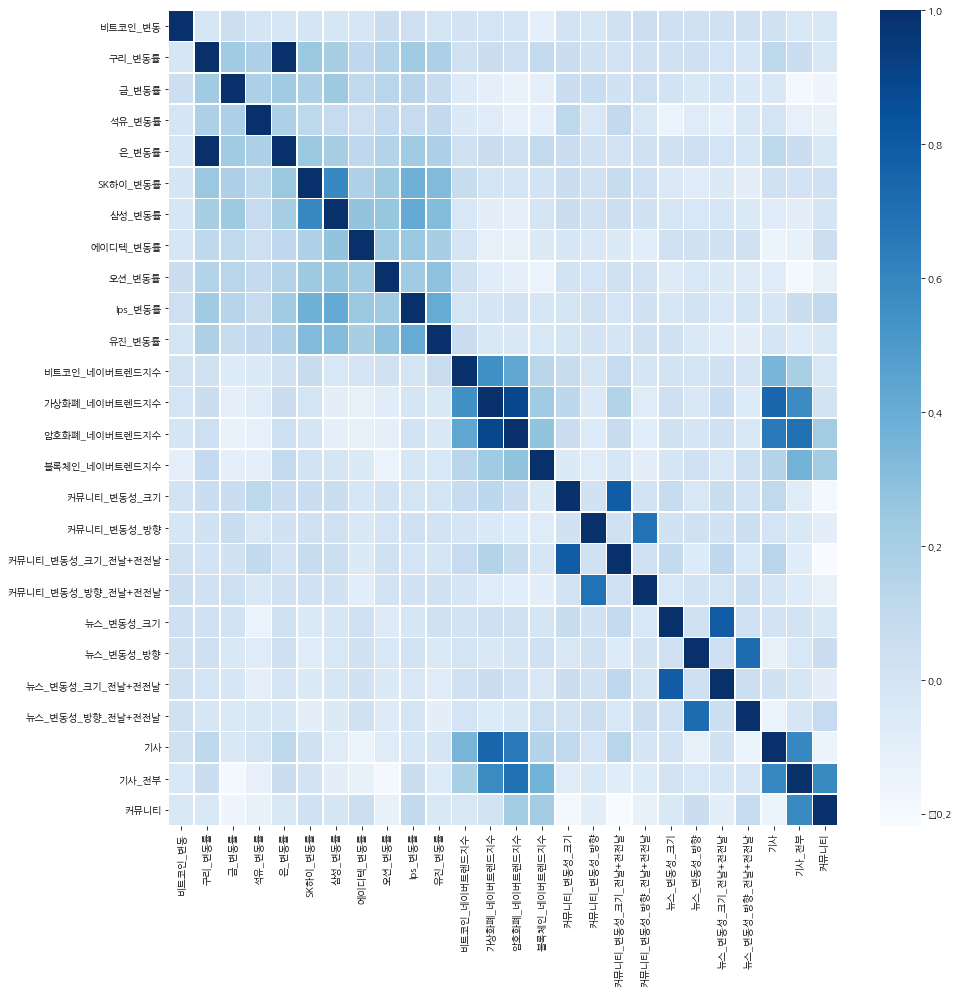

In [89]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df[list(df.columns[2:])].corr(), annot=False, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.savefig('../img/correlation.png')

## 범주에 따른 비교 (Boxplot)

In [90]:
df_size0 = df[df['비트코인_변동'].isin([0,3])]
df_size1 = df[df['비트코인_변동'].isin([1,2])]

### 원자재 데이터

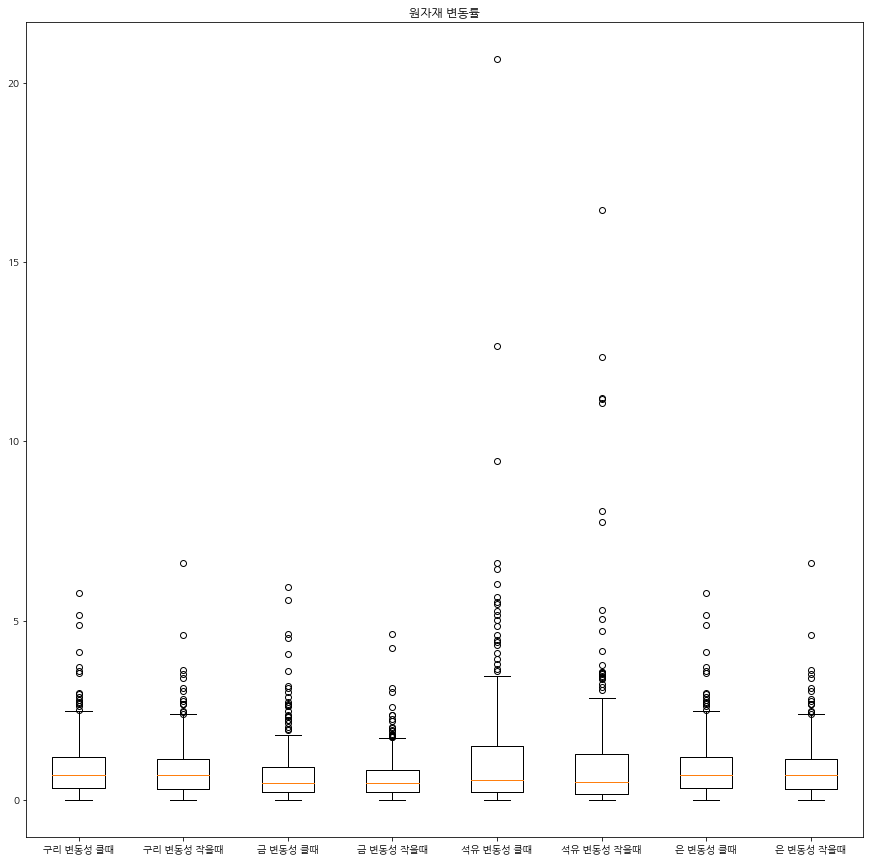

In [91]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,1,1)

ax1.boxplot([df_size0['구리_변동률'],df_size1['구리_변동률'],df_size0['금_변동률'],df_size1['금_변동률'],
            df_size0['석유_변동률'],df_size1['석유_변동률'],df_size0['은_변동률'],df_size1['은_변동률']],
            labels=['구리 변동성 클때','구리 변동성 작을때', '금 변동성 클때','금 변동성 작을때',
                    '석유 변동성 클때','석유 변동성 작을때', '은 변동성 클때','은 변동성 작을때'])
ax1.set_title("원자재 변동률")
plt.savefig('../img/EDA_원자재.png')
plt.show()


### 주식 데이터

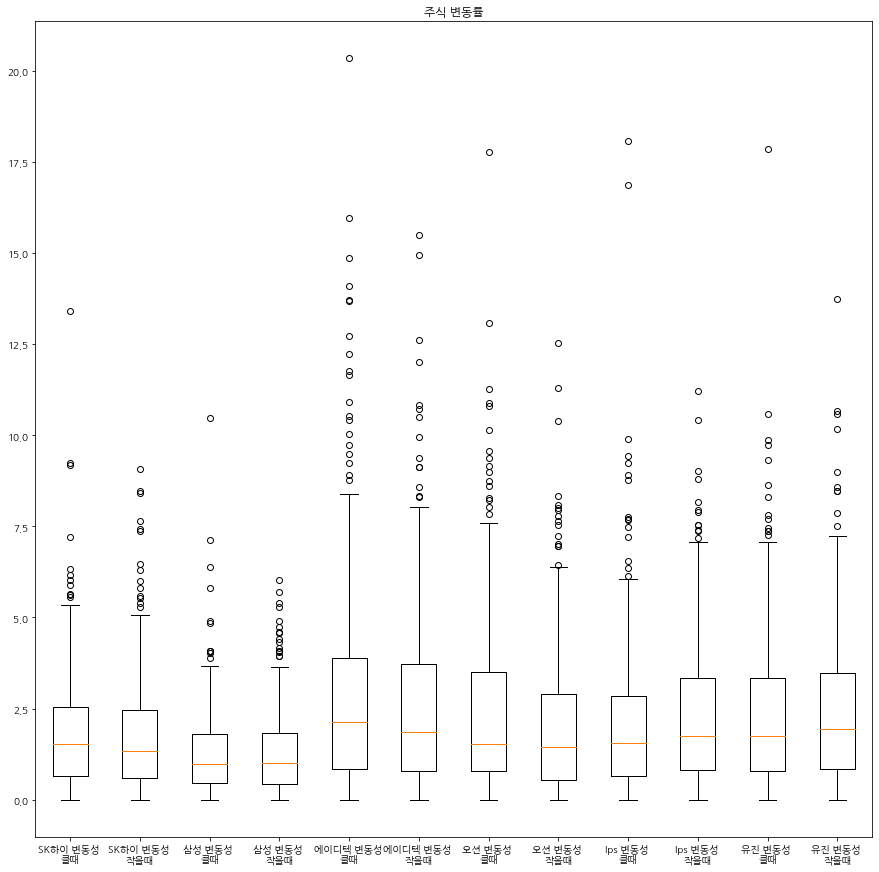

In [92]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,1,1)

ax1.boxplot([df_size0['SK하이_변동률'],df_size1['SK하이_변동률'],df_size0['삼성_변동률'],df_size1['삼성_변동률'],
            df_size0['에이디텍_변동률'],df_size1['에이디텍_변동률'],df_size0['오션_변동률'],df_size1['오션_변동률'],
             df_size0['Ips_변동률'],df_size1['Ips_변동률'],df_size0['유진_변동률'],df_size1['유진_변동률']],
            labels=['SK하이 변동성 \n클때','SK하이 변동성 \n작을때', '삼성 변동성 \n클때','삼성 변동성 \n작을때',
                    '에이디텍 변동성 \n클때','에이디텍 변동성 \n작을때','오션 변동성 \n클때','오션 변동성 \n작을때', 
                    'Ips 변동성 \n클때','Ips 변동성 \n작을때', '유진 변동성 \n클때','유진 변동성 \n작을때'])
ax1.set_title("주식 변동률")
plt.savefig('../img/EDA_주식.png')
plt.show()


### 네이버 트렌드지수 데이터

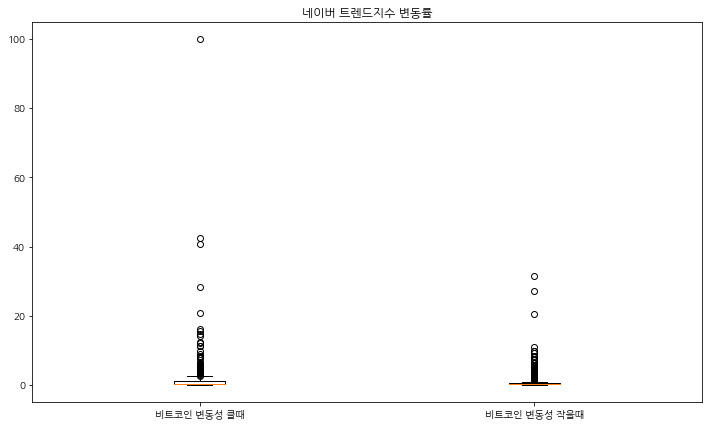

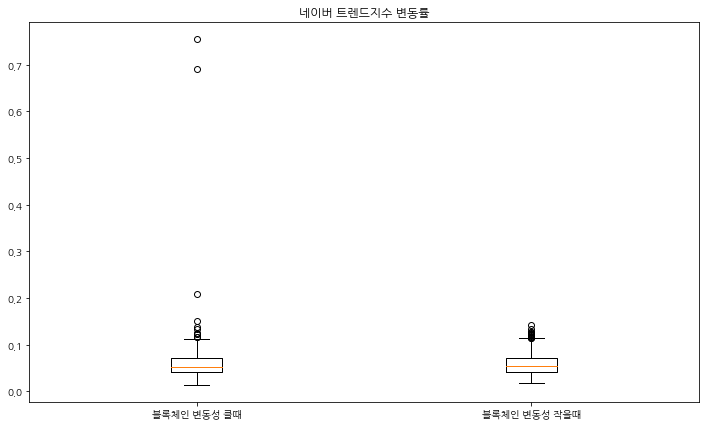

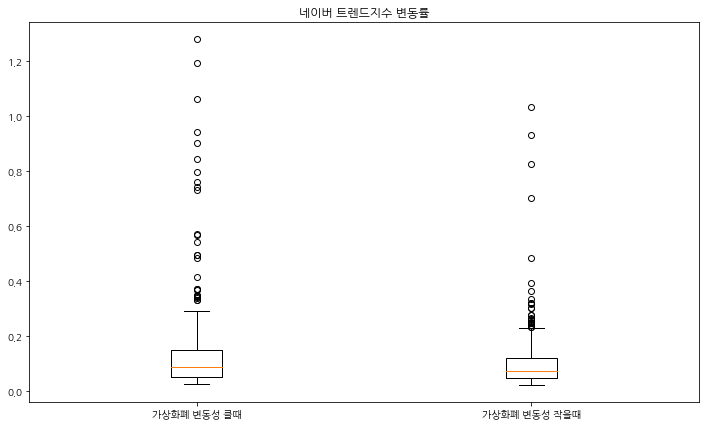

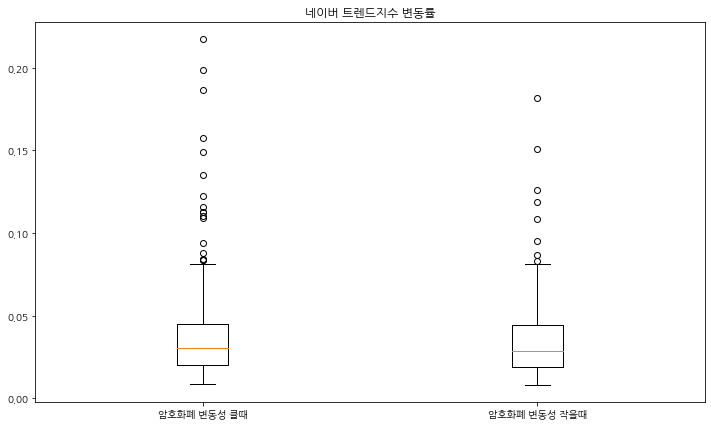

In [93]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,1,1)

ax1.boxplot([df_size0['비트코인_네이버트렌드지수'],df_size1['비트코인_네이버트렌드지수']],
            labels=['비트코인 변동성 클때','비트코인 변동성 작을때'])
ax1.set_title("네이버 트렌드지수 변동률")
plt.savefig('../img/EDA_네이버트렌드지수_비트코인.png')
plt.show()

fig = plt.figure(figsize=(12,7))
ax2 = fig.add_subplot(1,1,1)
ax2.boxplot([df_size0['블록체인_네이버트렌드지수'],df_size1['블록체인_네이버트렌드지수']],
            labels=['블록체인 변동성 클때','블록체인 변동성 작을때'])
ax2.set_title("네이버 트렌드지수 변동률")
plt.savefig('../img/EDA_네이버트렌드지수_블록체인.png')
plt.show()

fig = plt.figure(figsize=(12,7))
ax3 = fig.add_subplot(1,1,1)

ax3.boxplot([df_size0['가상화폐_네이버트렌드지수'],df_size1['가상화폐_네이버트렌드지수']],
            labels=['가상화폐 변동성 클때','가상화폐 변동성 작을때'])
ax3.set_title("네이버 트렌드지수 변동률")
plt.savefig('../img/EDA_네이버트렌드지수_가상화폐.png')
plt.show()

fig = plt.figure(figsize=(12,7))
ax4 = fig.add_subplot(1,1,1)
ax4.boxplot([df_size0['암호화폐_네이버트렌드지수'],df_size1['암호화폐_네이버트렌드지수']],
            labels=['암호화폐 변동성 클때','암호화폐 변동성 작을때'])
ax4.set_title("네이버 트렌드지수 변동률")
plt.savefig('../img/EDA_네이버트렌드지수_암호화폐.png')
plt.show()

### 커뮤니티 및 뉴스 변동성

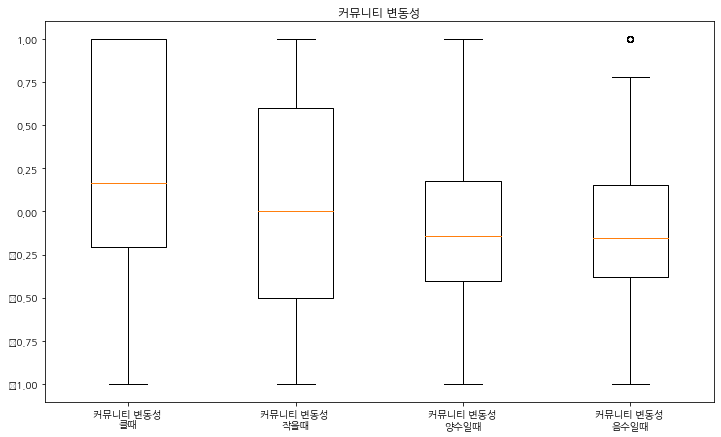

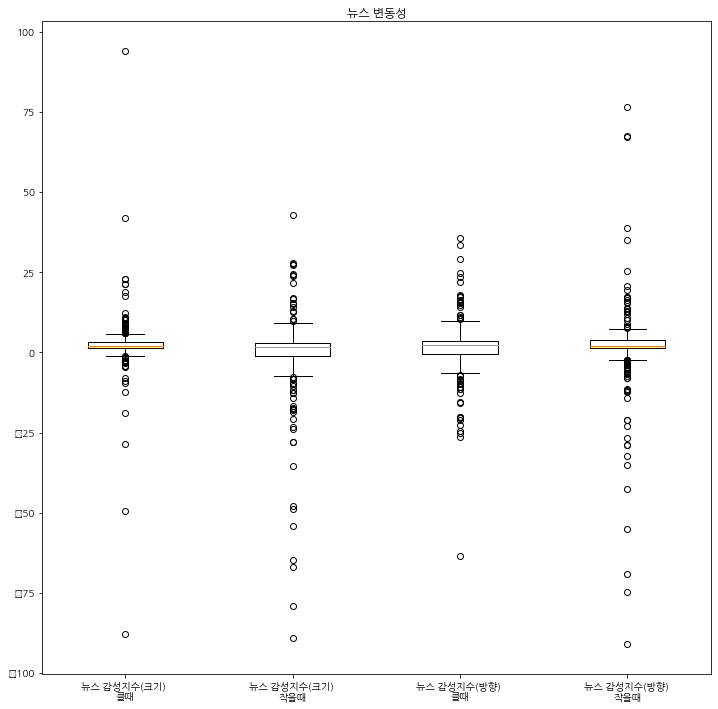

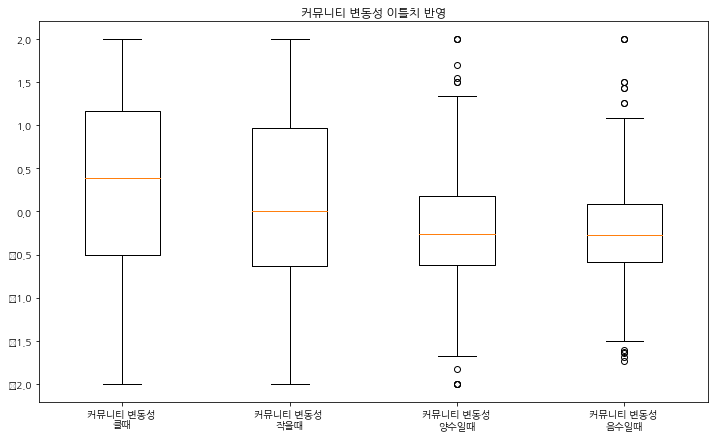

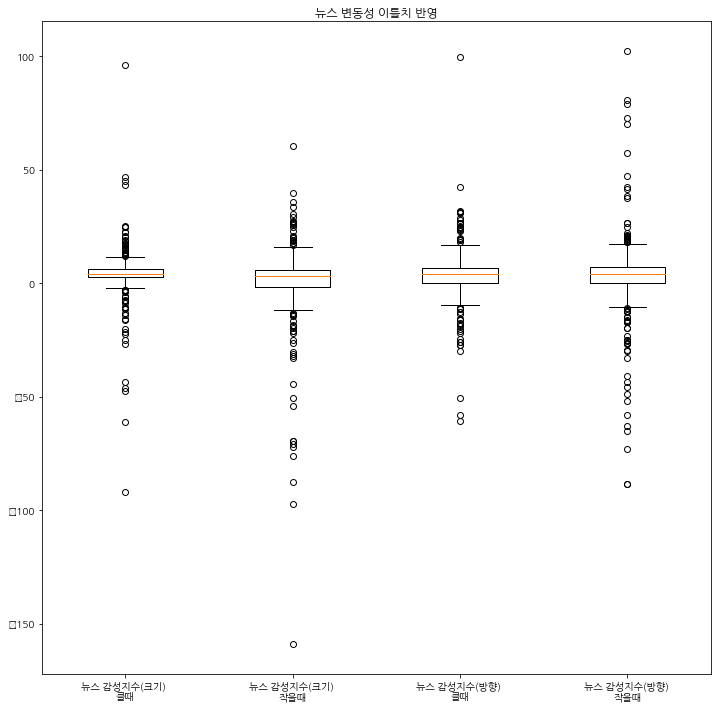

In [94]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,1,1)

ax1.boxplot([df_size0['커뮤니티_변동성_크기'],df_size1['커뮤니티_변동성_크기'],
            df_size0['커뮤니티_변동성_방향'],df_size1['커뮤니티_변동성_방향']],
            labels=['커뮤니티 변동성 \n클때','커뮤니티 변동성 \n작을때',
                   '커뮤니티 변동성 \n양수일때','커뮤니티 변동성 \n음수일때'])
ax1.set_title("커뮤니티 변동성")
plt.savefig('../img/EDA_커뮤니티_감성지수.png')
plt.show()

fig = plt.figure(figsize=(12,12))
ax2 = fig.add_subplot(1,1,1)

ax2.boxplot([df_size0['뉴스_변동성_크기'],df_size1['뉴스_변동성_크기'],
            df_size0['뉴스_변동성_방향'],df_size1['뉴스_변동성_방향']],
            labels=['뉴스 감성지수(크기) \n클때','뉴스 감성지수(크기) \n작을때',
                   '뉴스 감성지수(방향) \n클때','뉴스 감성지수(방향) \n작을때'])
ax2.set_title("뉴스 변동성")
plt.savefig('../img/EDA_뉴스_감성지수.png')
plt.show()

fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,1,1)
ax1.boxplot([df_size0['커뮤니티_변동성_크기_전날+전전날'],df_size1['커뮤니티_변동성_크기_전날+전전날'],
            df_size0['커뮤니티_변동성_방향_전날+전전날'],df_size1['커뮤니티_변동성_방향_전날+전전날']],
            labels=['커뮤니티 변동성 \n클때','커뮤니티 변동성 \n작을때',
                   '커뮤니티 변동성 \n양수일때','커뮤니티 변동성 \n음수일때'])
ax1.set_title("커뮤니티 변동성 이틀치 반영")
plt.savefig('../img/EDA_커뮤니티_감성지수_이틀치반영.png')
plt.show()

fig = plt.figure(figsize=(12,12))
ax2 = fig.add_subplot(1,1,1)
ax2.boxplot([df_size0['뉴스_변동성_크기_전날+전전날'],df_size1['뉴스_변동성_크기_전날+전전날'],
            df_size0['뉴스_변동성_방향_전날+전전날'],df_size1['뉴스_변동성_방향_전날+전전날']],
            labels=['뉴스 감성지수(크기) \n클때','뉴스 감성지수(크기) \n작을때',
                   '뉴스 감성지수(방향) \n클때','뉴스 감성지수(방향) \n작을때'])
ax2.set_title("뉴스 변동성 이틀치 반영")
plt.savefig('../img/EDA_뉴스_감성지수_이틀치반영.png')
plt.show()

### 기사/커뮤니티 글 개수

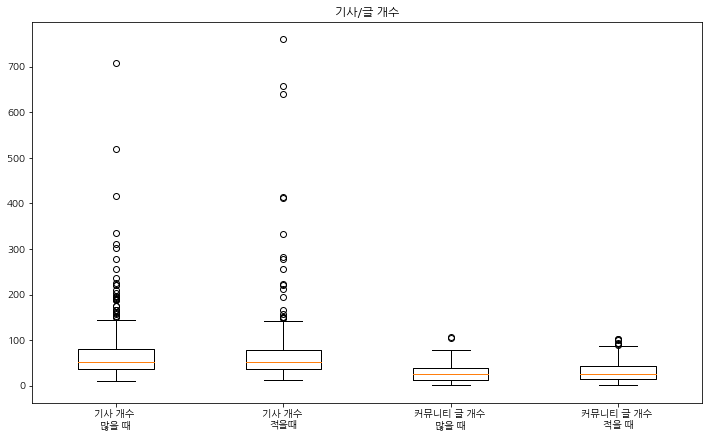

In [95]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,1,1)

ax1.boxplot([df_size0['기사'],df_size1['기사'],
            df_size0['커뮤니티'],df_size1['커뮤니티']],
            labels=['기사 개수 \n많을 때','기사 개수 \n적을때',
                   '커뮤니티 글 개수 \n많을 때','커뮤니티 글 개수 \n적을 때'])
ax1.set_title("기사/글 개수")
plt.savefig('../img/EDA_기사글개수.png')
plt.show()

# 📌변동성 크기 모델링

In [96]:
# 변동성 예측을 위해 변동이 큰 것(0)과 작은 것(1)으로 나눔

df.data, df.target = split_target(df, '비트코인_변동', [0, 3], '크기')
df.target

,비트코인_변동_크기
0,1
1,0
2,0
3,0
4,1
...,...
622,1
623,1
624,1
625,1


In [97]:
df.data.describe()

,종가,구리_변동률,금_변동률,석유_변동률,은_변동률,SK하이_변동률,삼성_변동률,에이디텍_변동률,오션_변동률,Ips_변동률,...,커뮤니티_변동성_방향,커뮤니티_변동성_크기_전날+전전날,커뮤니티_변동성_방향_전날+전전날,뉴스_변동성_크기,뉴스_변동성_방향,뉴스_변동성_크기_전날+전전날,뉴스_변동성_방향_전날+전전날,기사,기사_전부,커뮤니티
count,6.270000e+02,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,...,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000
mean,1.553598e+07,0.896938,0.705120,1.133923,0.896938,1.820080,1.315375,2.794625,2.249936,2.318931,...,-0.111971,0.221683,-0.221361,1.169612,1.577544,2.083295,3.133021,72.245614,159.435407,29.192982
std,1.646106e+07,0.829366,0.760916,1.860194,0.829366,1.639304,1.204873,2.847515,2.342045,2.184263,...,0.443387,1.066350,0.639264,11.062352,10.998236,16.056533,16.217024,75.642152,121.297920,19.403305
min,3.637000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-2.000000,-2.000000,-89.000000,-91.000000,-159.000000,-88.600000,11.000000,16.000000,1.000000
25%,7.391000e+06,0.320000,0.220000,0.200000,0.320000,0.600000,0.450000,0.800000,0.610000,0.760000,...,-0.386058,-0.550873,-0.599400,1.407994,1.247446,1.055615,0.113188,36.000000,63.000000,13.000000
50%,1.067500e+07,0.710000,0.480000,0.520000,0.710000,1.470000,1.000000,1.920000,1.490000,1.650000,...,-0.145833,0.202020,-0.266042,1.861111,2.163636,3.629721,4.083333,52.000000,108.000000,25.000000
75%,1.316900e+07,1.180000,0.890000,1.345000,1.180000,2.530000,1.820000,3.765000,3.065000,3.255000,...,0.158387,1.000000,0.114774,3.152358,3.800000,6.167364,7.038725,80.500000,234.000000,42.000000
max,8.066100e+07,6.620000,5.950000,20.670000,6.620000,13.400000,10.470000,20.340000,17.780000,18.070000,...,1.000000,2.000000,2.000000,94.000000,76.500000,96.052632,102.368421,760.000000,775.000000,107.000000


In [98]:
from sklearn.model_selection import KFold

In [99]:
# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target,
                                                   test_size=0.2, random_state=1)

In [100]:
df.feature_names = ['구리_변동률','금_변동률','석유_변동률','은_변동률','SK하이_변동률',
                    '삼성_변동률','에이디텍_변동률','오션_변동률','Ips_변동률','유진_변동률',
                    '비트코인_네이버트렌드지수', '가상화폐_네이버트렌드지수', '암호화폐_네이버트렌드지수',
                    '블록체인_네이버트렌드지수', '커뮤니티_변동성_크기', '커뮤니티_변동성_방향',
                    '커뮤니티_변동성_크기_전날+전전날', '커뮤니티_변동성_방향_전날+전전날',
                    '뉴스_변동성_크기', '뉴스_변동성_방향', '뉴스_변동성_크기_전날+전전날', '뉴스_변동성_방향_전날+전전날',
                    '기사', '기사_전부', '커뮤니티']

### Decision Tree

In [101]:
params = {
    'max_depth': [None, 2, 3, 4, 5, 6],
    'max_leaf_nodes': [None, 2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}
cv=KFold(n_splits=10, random_state=1, shuffle=True)
dt_clf=DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=cv, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
GridSearchCV 최고 평균 정확도 수치: 0.6149
GridSearchCV 최적 하이퍼 파라미터:  {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.0}


In [102]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_min_impurity_decrease', 'mean_test_score']].sort_values(ascending=False, by='mean_test_score')

# mean_test_score
# : 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치

,param_min_impurity_decrease,mean_test_score
170,0,0.614941
390,0,0.614902
511,0.01,0.614902
570,0,0.614902
571,0.01,0.614902
...,...,...
458,0.08,0.437373
457,0.07,0.437373
456,0.06,0.437373
218,0.08,0.437373


In [103]:
# 최적의 하이퍼 파라미터를 적용한 Decision Tree의 테스트 데이터 예측 정확도

dt_clf = grid_cv.best_estimator_
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.5794


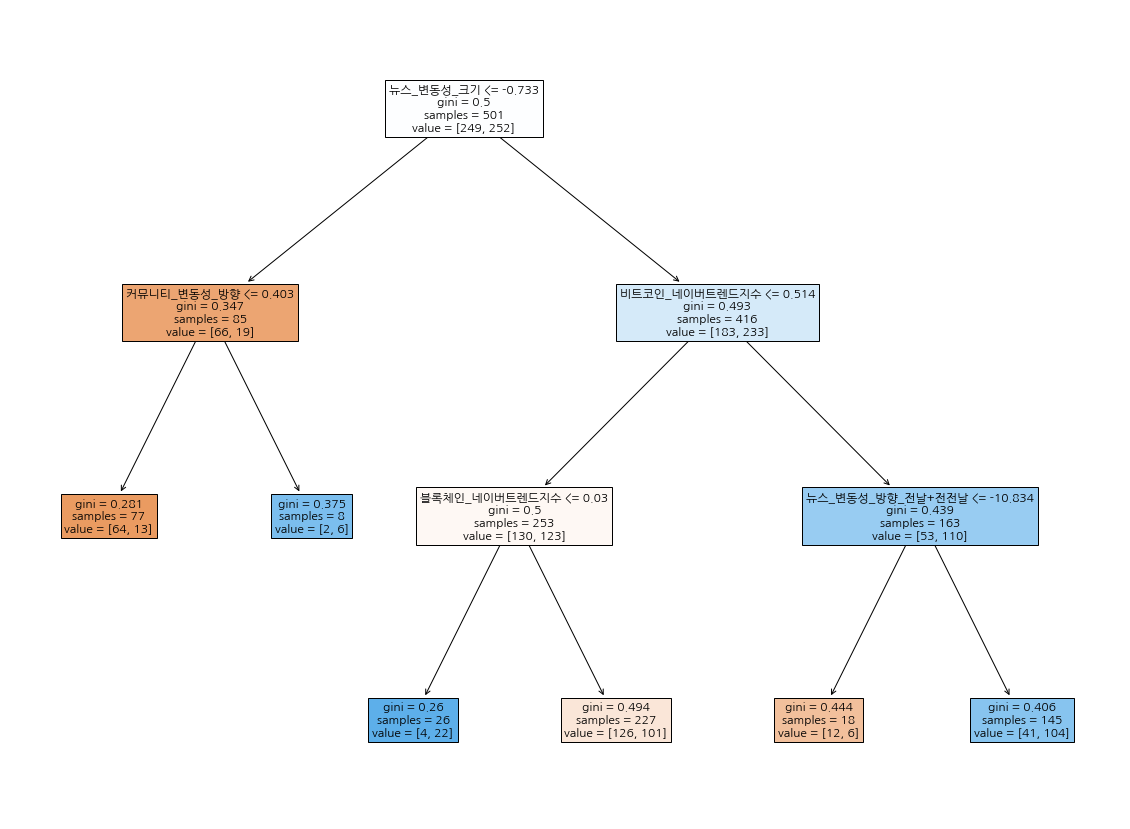

In [104]:
# 트리 시각화

plt.figure(figsize=(20,15))
plot_tree(dt_clf, filled=True, feature_names=X_train.columns, fontsize=12) 
plt.savefig('../img/decision_tree.png')
plt.show()


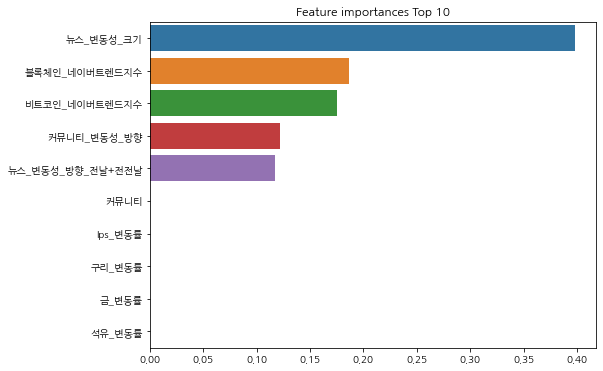

In [105]:
# 알고리즘이 선택한 피처의 중요도 막대그래프로 시각화

ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10, y = ftr_top10.index)
plt.show()

## Random Forest

In [106]:
# 기본 Random Forest의 테스트 데이터 정확도

rf_clf = RandomForestClassifier(random_state=2)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.5873


In [107]:
# Grid Search를 이용하여 최적의 하이퍼 파라미터 구하기

params = {
    'n_estimators': [16, 18, 20, 22],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': np.arange(0, 0.1, 0.005),
}

cv=KFold(n_splits=10, random_state=1, shuffle=True)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=cv, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'criterion': 'entropy', 'min_impurity_decrease': 0.015, 'n_estimators': 20}
최고 예측 정확도: 0.5988


In [108]:
# 최적의 하이퍼 파라미터를 적용한 Random Forest의 테스트 데이터 예측 정확도

rf_clf = grid_cv.best_estimator_
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.6032


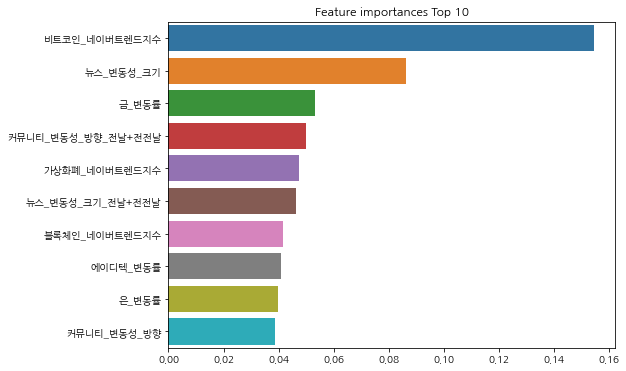

In [109]:
# 알고리즘이 선택한 피처의 중요도 막대그래프로 시각화

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10, y = ftr_top10.index)
plt.savefig('../img/random_forest.png')
plt.show()

## XGBoost

In [110]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

In [111]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
        F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [112]:
# Grid Search를 이용하여 최적의 하이퍼 파라미터 구하기

params = {
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.005, 0.001],
    # 'alpha': [0.2, 0.5, 1]
}

cv=KFold(n_splits=10, random_state=1, shuffle=True)
xgb_clf = XGBClassifier(random_state=0, n_jobs=-1, eval_metric="auc")
grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv=cv, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 100}
최고 예측 정확도: 0.6129


In [113]:
xgb_wrapper = grid_cv.best_estimator_
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
               eval_set=evals, verbose=False)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [114]:
# 조기 중단으로 학습된 XGBClassifier의 예측 성능
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[41 25]
 [29 31]]
정확도: 0.5714, 정밀도: 0.5536, 재현율: 0.5167,         F1: 0.5345, AUC:0.6506


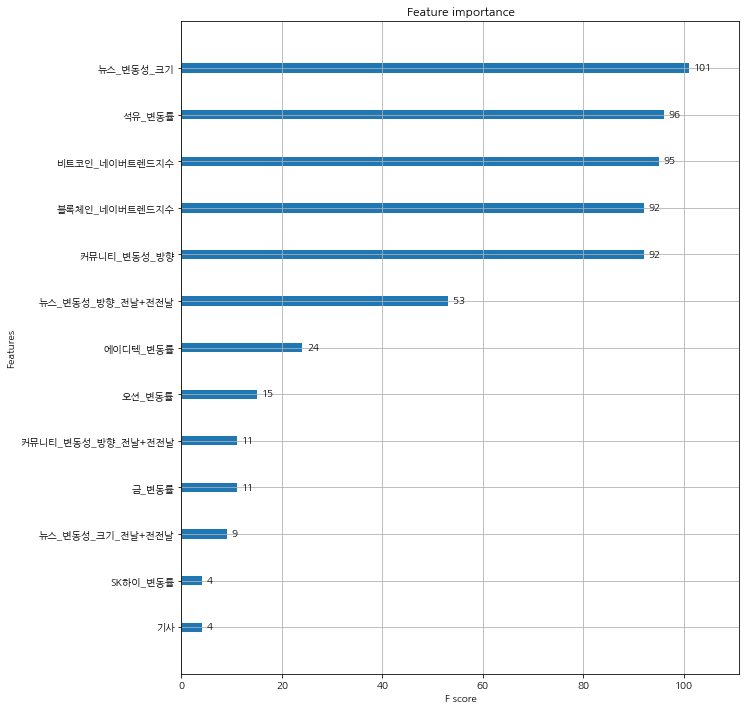

In [115]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)
plt.savefig('../img/xgboost.png')

## LightGBM

In [116]:
# pip install lightgbm

In [117]:
from lightgbm import LGBMClassifier

In [118]:
lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, eval_metric='auc', eval_set=evals,
            verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.6848


In [119]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
         'max_depth': [128,160],
         'min_child_samples':[60, 100],
         'subsample':[0.8, 1]}

cv=KFold(n_splits=10, random_state=1, shuffle=True)
grid_cv = GridSearchCV(lgbm_clf, param_grid=params, cv=cv)
grid_cv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', verbose=False,
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
lgbm_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}
최고 예측 정확도: 0.5768
ROC AUC:0.6965


In [120]:
lgbm_clf = grid_cv.best_estimator_
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals,
            verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.6965


In [121]:
ws100_preds = lgbm_clf.predict(X_test)
ws100_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

In [122]:
# 조기 중단으로 학습된 lgbmClassifier의 예측 성능
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[36 30]
 [18 42]]
정확도: 0.6190, 정밀도: 0.5833, 재현율: 0.7000,         F1: 0.6364, AUC:0.6965


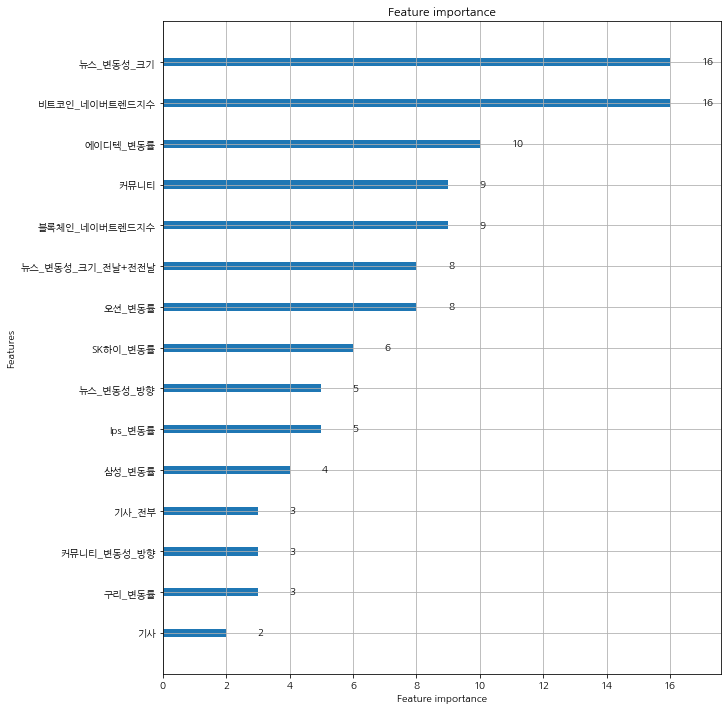

In [123]:
from lightgbm import plot_importance

f, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, max_num_features=15, ax=ax)
plt.savefig('../img/light_gbm.png')


# 📌코로나 전후 모델링

In [124]:
from sklearn.model_selection import KFold

In [125]:
# 전 : 2018.08.01 - 2020.01.19 
# 후 : 2020.01.20 - 2021.04.30

df_before = DF[DF['날짜'] <= '2020-01-19']
df_after = DF[DF['날짜'] > '2020-01-19']

## 코로나 전

In [126]:
df = df_before

In [127]:
# 변동성 예측을 위해 변동이 큰 것(0)과 작은 것(1)으로 나눔

df.data, df.target = split_target(df, '비트코인_변동', [0, 3], '크기')
df.target

,비트코인_변동_크기
286,1
287,0
288,0
289,1
290,0
...,...
622,1
623,1
624,1
625,1


In [128]:
# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target,
                                                   test_size=0.2, random_state=1)

In [129]:
df.feature_names = ['구리_변동률','금_변동률','석유_변동률','은_변동률','SK하이_변동률',
                    '삼성_변동률','에이디텍_변동률','오션_변동률','Ips_변동률','유진_변동률',
                    '비트코인_네이버트렌드지수', '가상화폐_네이버트렌드지수', '암호화폐_네이버트렌드지수',
                    '블록체인_네이버트렌드지수', '커뮤니티_변동성_크기', '커뮤니티_변동성_방향',
                    '뉴스_변동성_크기', '뉴스_변동성_방향', '기사', '기사_전부', '커뮤니티']

### Decision Tree

In [130]:
params = {
    'max_depth': [None, 2, 3, 4, 5, 6],
    'max_leaf_nodes': [None, 2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}
dt_clf=DecisionTreeClassifier(random_state=0)
cv=KFold(n_splits=10, random_state=0, shuffle=True)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=cv, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
GridSearchCV 최고 평균 정확도 수치: 0.5996
GridSearchCV 최적 하이퍼 파라미터:  {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.0}


In [131]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_min_impurity_decrease', 'mean_test_score']].sort_values(ascending=False, by='mean_test_score')

# mean_test_score
# : 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치

,param_min_impurity_decrease,mean_test_score
350,0,0.599603
291,0.01,0.599603
290,0,0.599603
351,0.01,0.599603
50,0,0.599603
...,...,...
218,0.08,0.452381
219,0.09,0.452381
227,0.07,0.452381
228,0.08,0.452381


In [132]:
# 최적의 하이퍼 파라미터를 적용한 Decision Tree의 테스트 데이터 예측 정확도

dt_clf = grid_cv.best_estimator_
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.5362


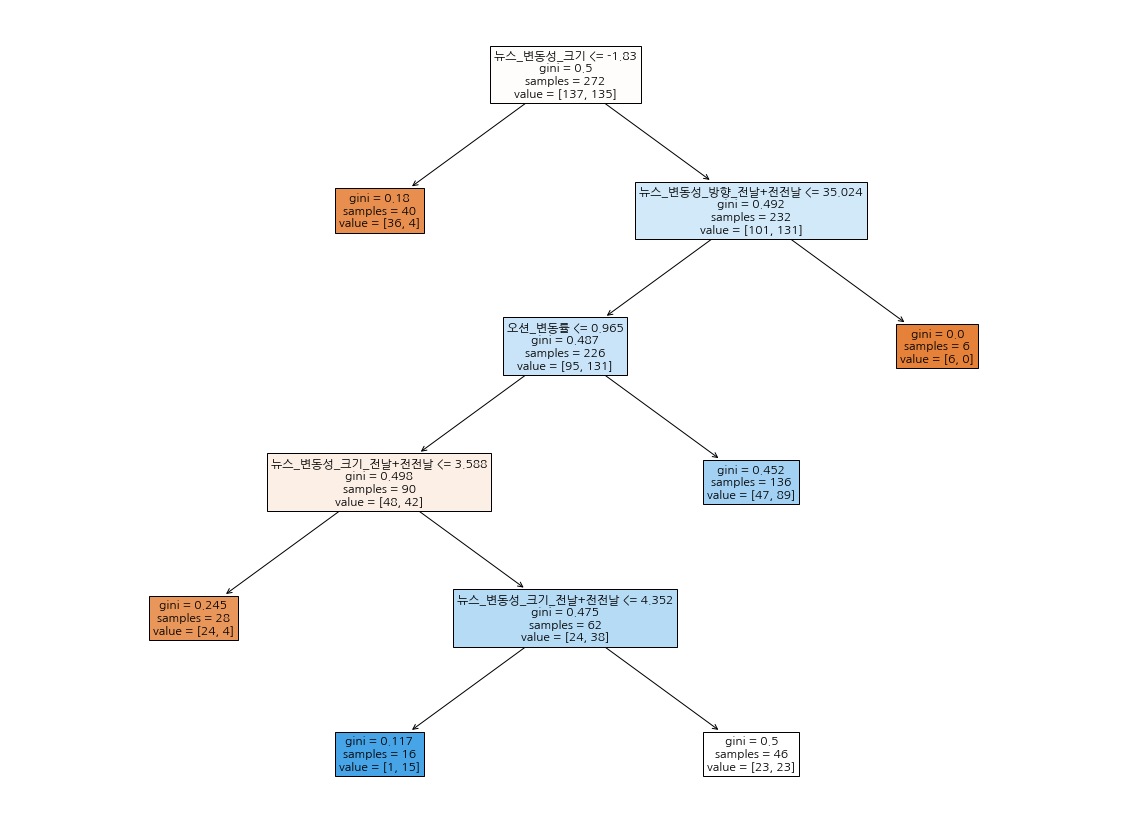

<Figure size 432x288 with 0 Axes>

In [133]:
# 트리 시각화

plt.figure(figsize=(20,15))
plot_tree(dt_clf, filled=True, feature_names=X_train.columns, fontsize=12) 
plt.show()
plt.savefig('../img/before_dt.png')


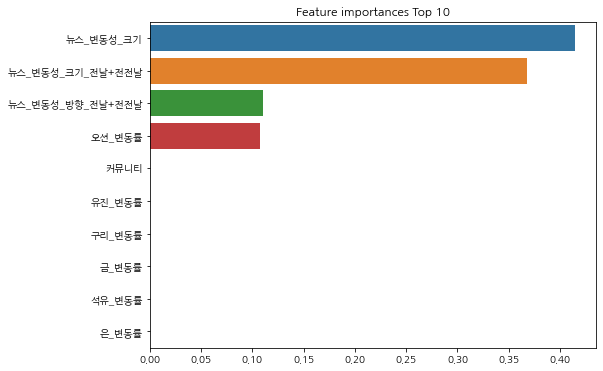

In [134]:
# 알고리즘이 선택한 피처의 중요도 막대그래프로 시각화

ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10, y = ftr_top10.index)
plt.show()

### Random Forest

In [135]:
# 기본 Random Forest의 테스트 데이터 정확도

rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7391


In [136]:
# Grid Search를 이용하여 최적의 하이퍼 파라미터 구하기

params = {
    'n_estimators': [18, 20, 22],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
cv=KFold(n_splits=10, random_state=0, shuffle=True)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=cv, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'criterion': 'gini', 'min_impurity_decrease': 0.05, 'n_estimators': 18}
최고 예측 정확도: 0.6179


In [137]:
# 최적의 하이퍼 파라미터를 적용한 Random Forest의 테스트 데이터 예측 정확도

rf_clf = grid_cv.best_estimator_
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.5797


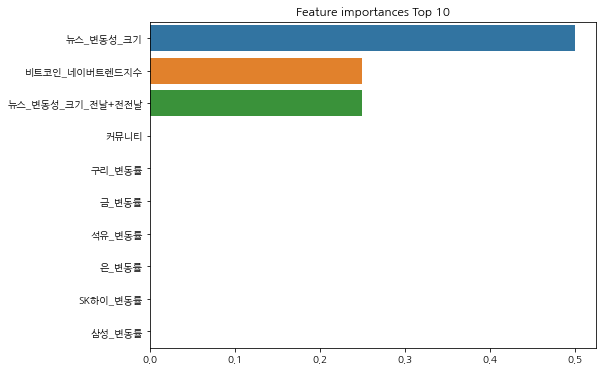

<Figure size 432x288 with 0 Axes>

In [138]:
# 알고리즘이 선택한 피처의 중요도 막대그래프로 시각화

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10, y = ftr_top10.index)
plt.show()
plt.savefig('../img/before_rf.png')


### XGBoost

In [139]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

In [140]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
        F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [141]:
# Grid Search를 이용하여 최적의 하이퍼 파라미터 구하기

params = {
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.005, 0.001],
    # 'alpha': [0.2, 0.5, 1]
}

xgb_clf = XGBClassifier(random_state=0, n_jobs=-1, eval_metric="auc")
cv=KFold(n_splits=10, random_state=0, shuffle=True)
grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv=cv, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: 
 {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 200}
최고 예측 정확도: 0.5844


In [142]:
xgb_wrapper = grid_cv.best_estimator_
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
               eval_set=evals, verbose=False)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [143]:
# 조기 중단으로 학습된 XGBClassifier의 예측 성능
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[11 23]
 [ 4 31]]
정확도: 0.6087, 정밀도: 0.5741, 재현율: 0.8857,         F1: 0.6966, AUC:0.6731


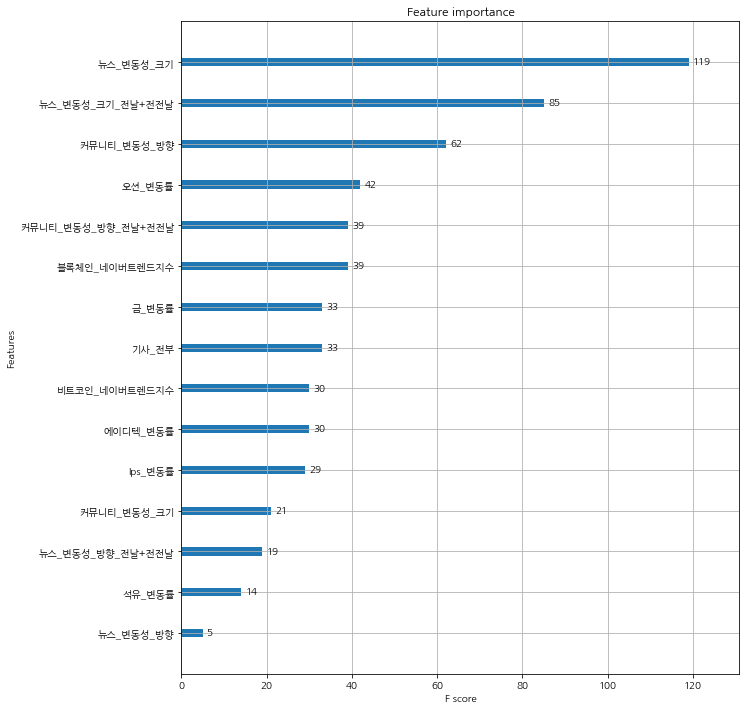

In [144]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)
plt.savefig('../img/before_xgboost.png')

### LightGBM

In [145]:
# pip install lightgbm

In [146]:
from lightgbm import LGBMClassifier

In [147]:
lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, eval_metric='auc', eval_set=evals,
            verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.7168


In [148]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
         'max_depth': [128,160],
         'min_child_samples':[60, 100],
         'subsample':[0.8, 1]}

cv=KFold(n_splits=10, random_state=0, shuffle=True)
grid_cv = GridSearchCV(lgbm_clf, param_grid=params, cv=cv)
grid_cv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', verbose=False,
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

lgbm_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
최고 예측 정확도: 0.6357
ROC AUC:0.6672


In [149]:
lgbm_clf = grid_cv.best_estimator_
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals,
            verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.6672


In [150]:
ws100_preds = lgbm_clf.predict(X_test)
ws100_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

In [151]:
# 조기 중단으로 학습된 lgbmClassifier의 예측 성능
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[20 14]
 [12 23]]
정확도: 0.6232, 정밀도: 0.6216, 재현율: 0.6571,         F1: 0.6389, AUC:0.6672


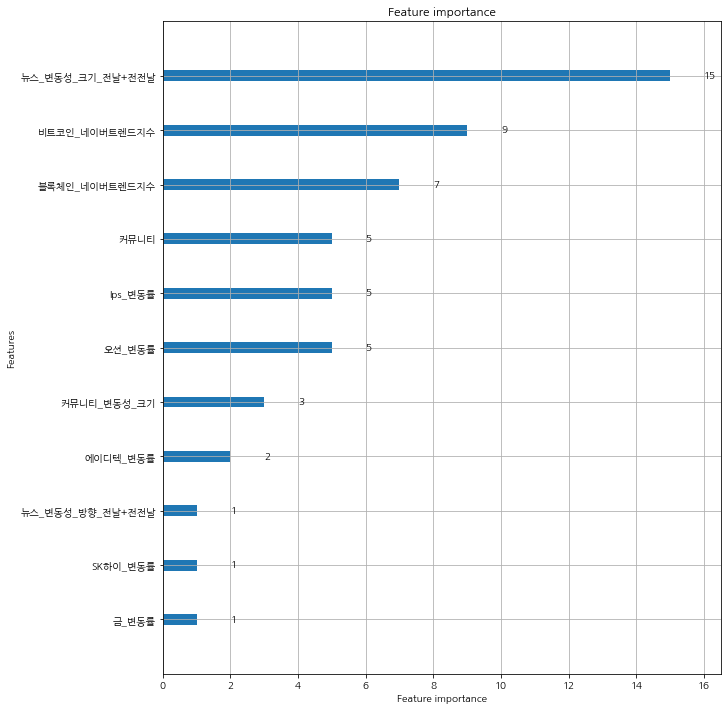

In [152]:
from lightgbm import plot_importance

f, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, max_num_features=15, ax=ax)
plt.savefig('../img/before_lgbm.png')

## 코로나 후

In [153]:
df = df_after

In [154]:
# 변동성 예측을 위해 변동이 큰 것(0)과 작은 것(1)으로 나눔

df.data, df.target = split_target(df, '비트코인_변동', [0, 3], '크기')
df.target

,비트코인_변동_크기
0,1
1,0
2,0
3,0
4,1
...,...
281,0
282,1
283,1
284,0


In [155]:
# train/test 분리
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target,
                                                   test_size=0.2, random_state=1)

In [156]:
df.feature_names = ['구리_변동률','금_변동률','석유_변동률','은_변동률','SK하이_변동률',
                    '삼성_변동률','에이디텍_변동률','오션_변동률','Ips_변동률','유진_변동률',
                    '비트코인_네이버트렌드지수', '가상화폐_네이버트렌드지수', '암호화폐_네이버트렌드지수',
                    '블록체인_네이버트렌드지수', '커뮤니티_변동성_크기', '커뮤니티_변동성_방향',
                    '뉴스_변동성_크기', '뉴스_변동성_방향', '기사', '기사_전부', '커뮤니티']

### Decision Tree

In [ ]:
params = {
    'max_depth': [None, 2, 3, 4, 5, 6],
    'max_leaf_nodes': [None, 2, 3, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}
dt_clf=DecisionTreeClassifier(random_state=0)
cv=KFold(n_splits=10, random_state=0, shuffle=True)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=cv, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [ ]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_min_impurity_decrease', 'mean_test_score']].sort_values(ascending=False, by='mean_test_score')

# mean_test_score
# : 5개 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치

In [ ]:
# 최적의 하이퍼 파라미터를 적용한 Decision Tree의 테스트 데이터 예측 정확도

dt_clf = grid_cv.best_estimator_
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

In [ ]:
# 트리 시각화

plt.figure(figsize=(20,15))
plot_tree(dt_clf, filled=True, feature_names=X_train.columns, fontsize=12) 
plt.show()
plt.savefig('../img/after_dt.png')

In [ ]:
# 알고리즘이 선택한 피처의 중요도 막대그래프로 시각화

ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10, y = ftr_top10.index)
plt.show()

### Random Forest

In [ ]:
# 기본 Random Forest의 테스트 데이터 정확도

rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

In [ ]:
# Grid Search를 이용하여 최적의 하이퍼 파라미터 구하기

params = {
    'n_estimators': [18, 20, 22],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
cv=KFold(n_splits=10, random_state=0, shuffle=True)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=cv, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# 최적의 하이퍼 파라미터를 적용한 Random Forest의 테스트 데이터 예측 정확도

rf_clf = grid_cv.best_estimator_
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

In [ ]:
# 알고리즘이 선택한 피처의 중요도 막대그래프로 시각화

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 10')
sns.barplot(x=ftr_top10, y = ftr_top10.index)
plt.show()
plt.savefig('../img/after_rf.png')

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
        F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# Grid Search를 이용하여 최적의 하이퍼 파라미터 구하기

params = {
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.005, 0.001],
    # 'alpha': [0.2, 0.5, 1]
}

xgb_clf = XGBClassifier(random_state=0, n_jobs=-1, eval_metric="auc")
cv=KFold(n_splits=10, random_state=0, shuffle=True)
grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv=cv, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
xgb_wrapper = grid_cv.best_estimator_
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
               eval_set=evals, verbose=False)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
# 조기 중단으로 학습된 XGBClassifier의 예측 성능
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)
plt.savefig('../img/after_xgboost.png')

### LightGBM

In [ ]:
# pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, eval_metric='auc', eval_set=evals,
            verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
         'max_depth': [128,160],
         'min_child_samples':[60, 100],
         'subsample':[0.8, 1]}

cv=KFold(n_splits=10, random_state=0, shuffle=True)
grid_cv = GridSearchCV(lgbm_clf, param_grid=params, cv=cv)
grid_cv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', verbose=False,
          eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))
lgbm_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

In [ ]:
lgbm_clf = grid_cv.best_estimator_
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals,
            verbose=False)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

In [ ]:
ws100_preds = lgbm_clf.predict(X_test)
ws100_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

In [ ]:
# 조기 중단으로 학습된 lgbmClassifier의 예측 성능
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

In [ ]:
from lightgbm import plot_importance

f, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, max_num_features=15, ax=ax)
plt.savefig('../img/after_lgbm.png')